In [22]:
%load_ext autoreload
%autoreload 2

import numpy as np

from mopet import mopet

from synchronization import plots   
from synchronization import runner
from synchronization import constants

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# PING Model with Sparse Connectivity

* In this notebook we model two interconnected excitatory-inhibitory networks with sparse random connectivity
* Gamma band activity is created by the PING mechanism
* Each neuron is subject to uncorrelated noise
* We explore the effect of noise strength on within and across network synchronization and try to extend Meng and Riecke's results to EI networks.

In [2]:
params = {
    # Coupling Strengths
    "J_itoi": 0.7,
    "J_etoe": 0.01,
    "J_etoi": 0.05,
    "J_itoe": 0.5,
    
    "J_ppee": 0.01,
    "J_ppei": 0.03,

    "p_ppee": 0.1,
    "p_ppei": 0.4,
    "p_ppii": 0.0,
    
    "p_etoi": 0.4,
    "p_etoe": 0.2,
    "p_itoe": 0.4,
    "p_itoi": 0.4,

    "ou_enabled": [False, False],

    "poisson_enabled": [True, True],
    "poisson_variance": 1.0,
    "poisson_p": 0.84,
    "poisson_size": 800,
    "poisson_mean_input": 300,
    "poisson_I_ratio": 0.4,
    "poisson_I_enabled": True,
    
    "N_pop": 2,
    "net_record_spikes": 400,
    "const_delay": 0.0,
}

## **State 1** - Low Noise and Low Coupling

Unsynchronized activity across and synchronized activity within networks

In [27]:
params_mid = dict(params)
params_mid.update({
    "runtime": 5000,
    "poisson_variance": 0.7,
})

model = runner.run(
    modified_params=params_mid,
    file_name="PING_sparse_base",
    load=True
)

Average E firing frequency: 67.52021008784328
Average I firing frequency: 29.476770840355613
Global Order Parameter value of: 0.591448505578933
Mean Phase Coherence 0.13132682107052548
Computing within synchronization for network 1 and 2
Within Synchronization of Network 1 0.5735156835200675
Within Synchronization of Network 2 0.6530927075467016


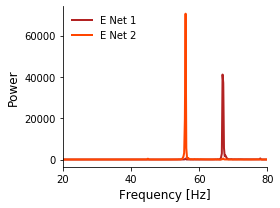

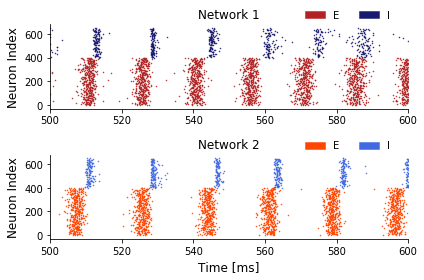

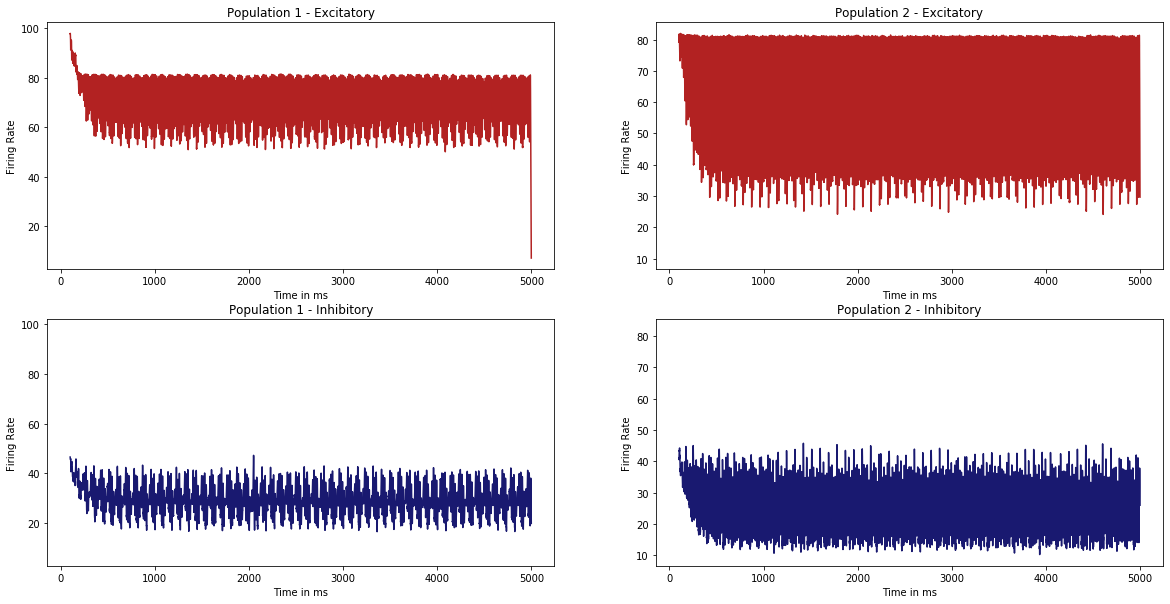

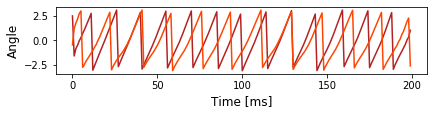

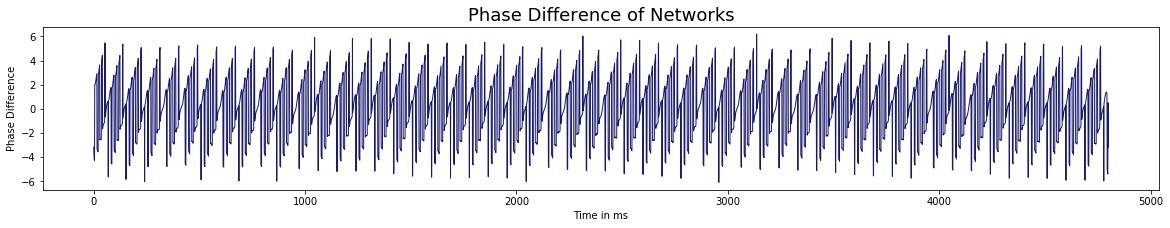

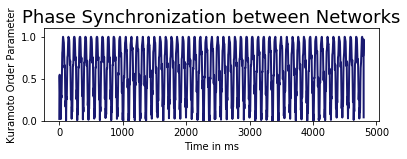

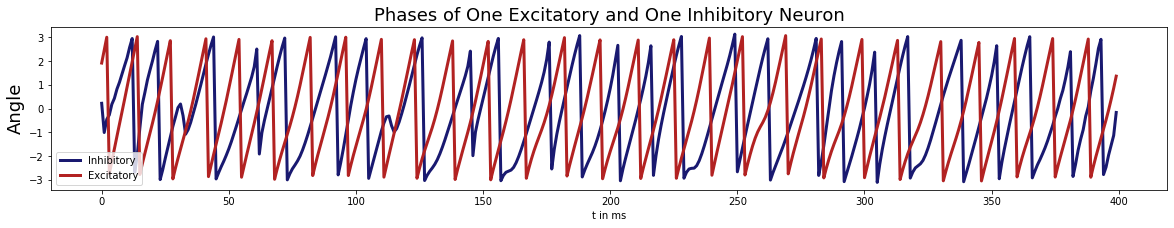

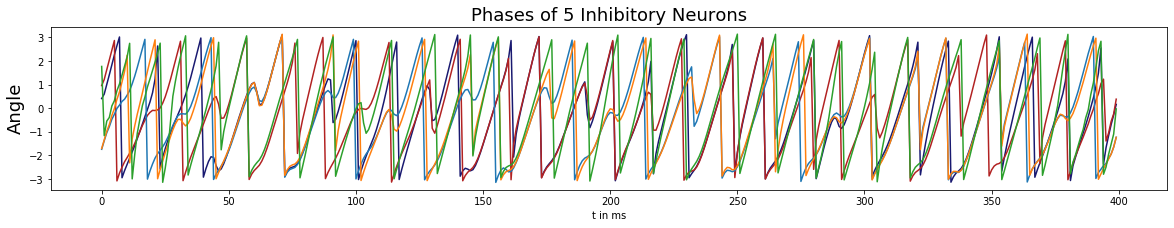

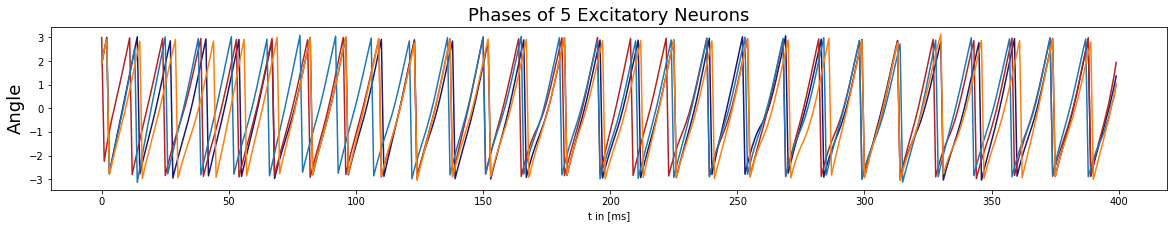

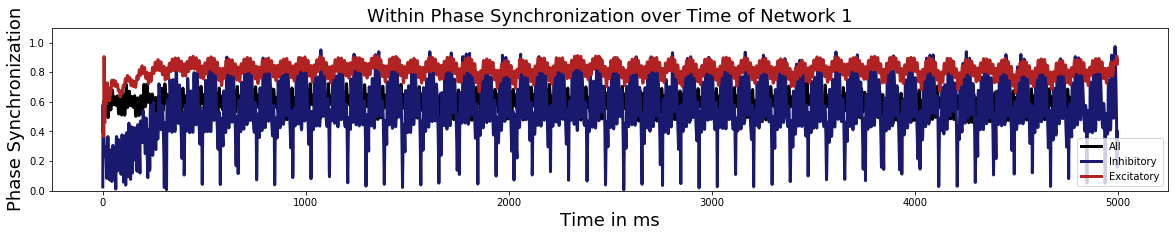

In [28]:
plots.plot_results(
    model, 
    pop_rates=True, 
    full_raster=False, 
    folder="PING_weak_noise", 
    x_min_psd=20,
    x_max_psd=80, 
    phase_analysis=True, 
    save=True,
    excerpt_x_left=500,
    excerpt_x_right=600,
    psd_group="EXC",
    psd_combine=True,
    show_lfp=False,
    first=True,
)

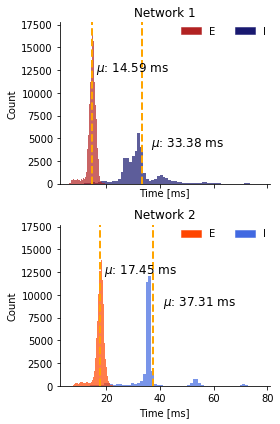

In [6]:
plots.isi_histograms(model, filter_outlier=True, folder="PING", key="normal")

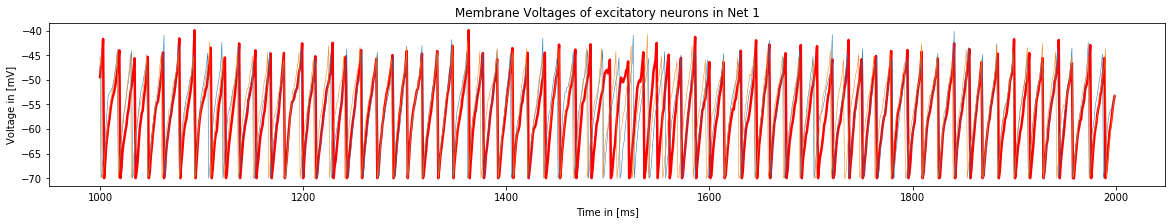

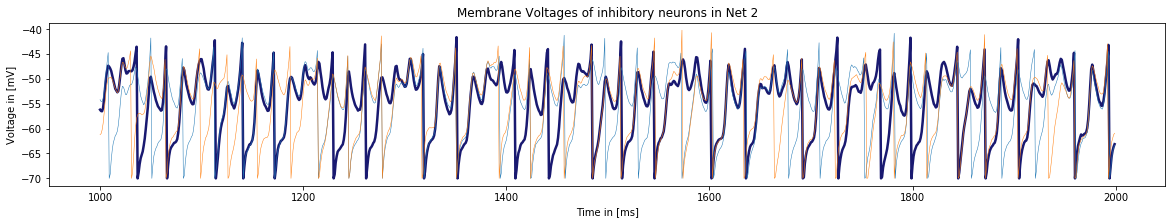

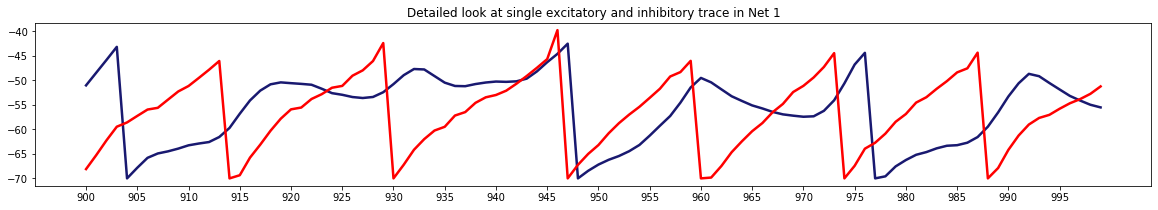

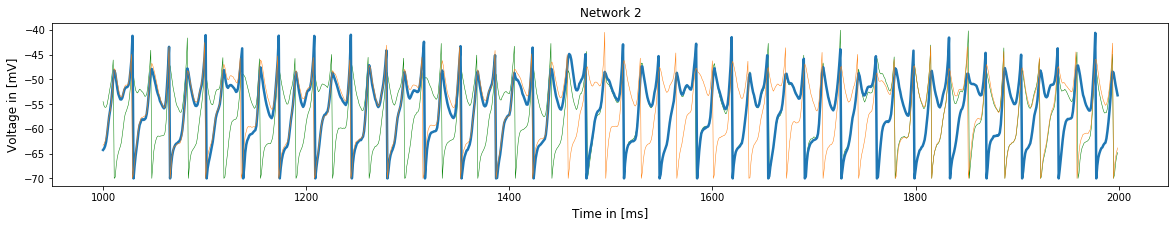

In [95]:
plots.membrane_potentials_sample(model, window=(1000, 2000))

4
246


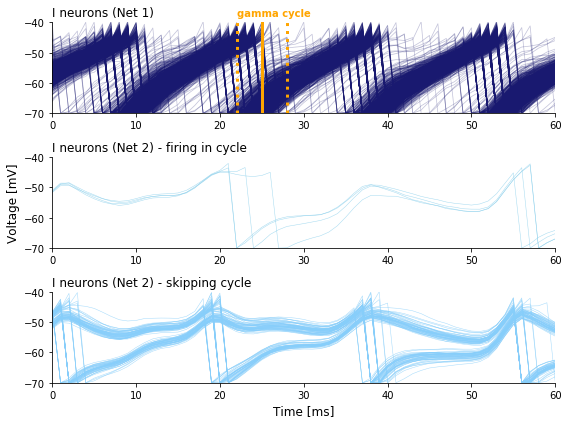

In [96]:
window=(920, 980)

v_e = model["v_all_neurons_e"]
v2 = model["v_all_neurons_i2"]

plots.spike_variability_analysis(v_e, v2, window=window, t_s=945, t_width=(3, 3), folder="PING", key="normal")

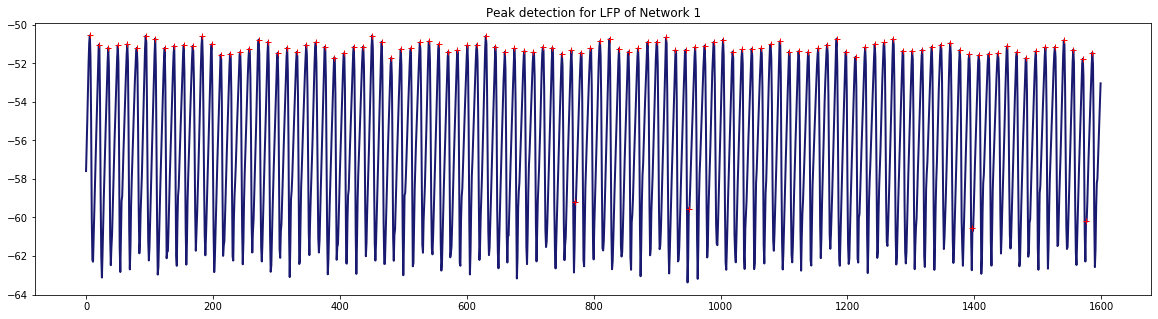

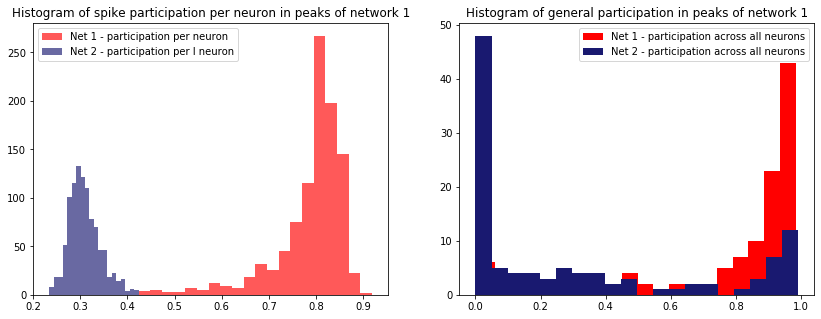

In [97]:
plots.spike_participation_histograms(model)

308 310


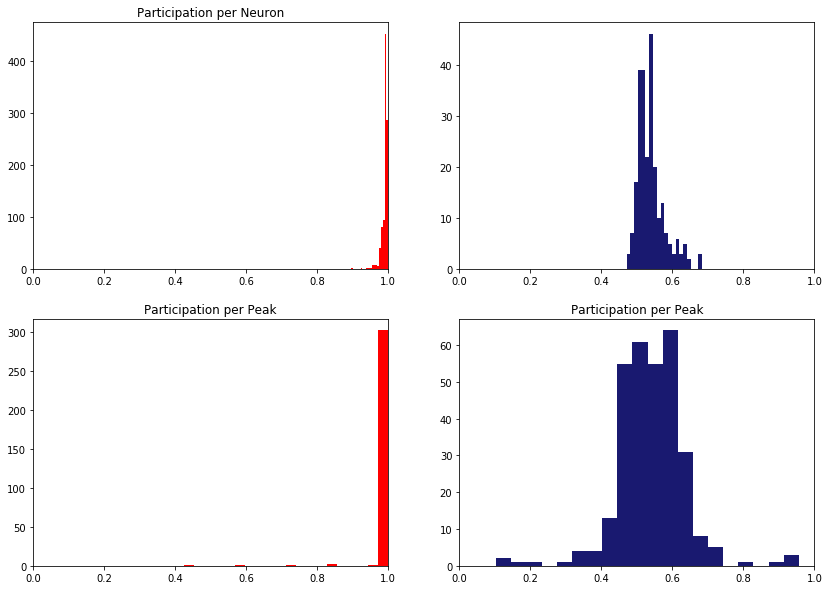

In [98]:
plots.spike_participation_histograms_per_network(model)

257 258


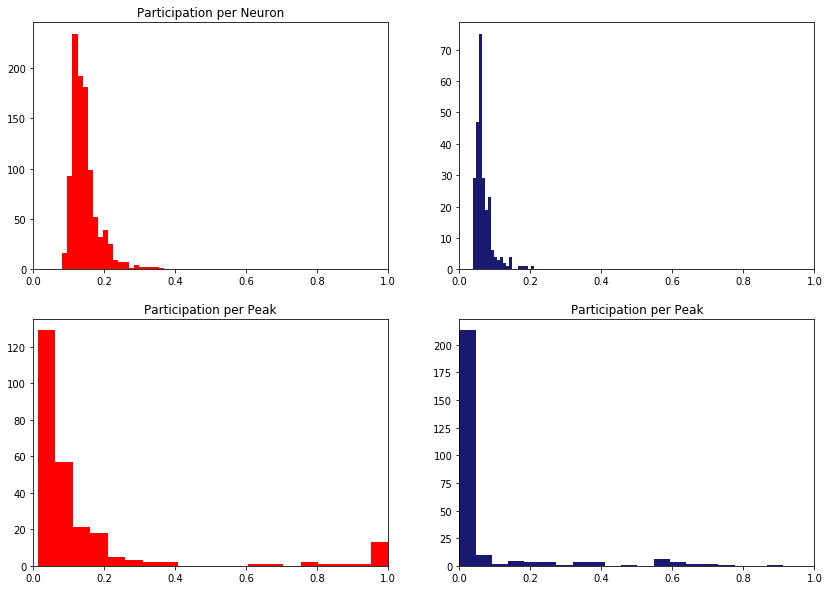

In [99]:
plots.spike_participation_histograms_per_network(model, network=2, show_detection=False)

## **State 2** - Increased coupling strength leads to synchronization

Synchronized activity across and synchronized activity within networks

In [18]:
params_mid = dict(params)
params_mid.update({
    "runtime": 5000,
    "poisson_variance": 0.7,
    "J_ppei": 0.07,
})

model = runner.run(
    modified_params=params_mid,
    file_name="PING_coupling",
    load=True
)

Average E firing frequency: 60.07774359469634
Average I firing frequency: 50.859477562084074
Global Order Parameter value of: 0.8017797508966095
Mean Phase Coherence 0.9568382965811713
Computing within synchronization for network 1 and 2
Within Synchronization of Network 1 0.6023878987931621
Within Synchronization of Network 2 0.5852096650905054


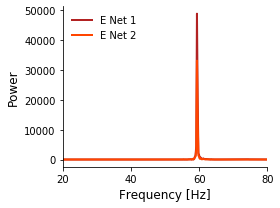

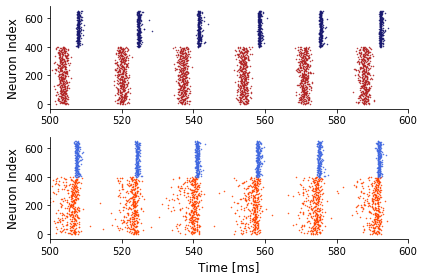

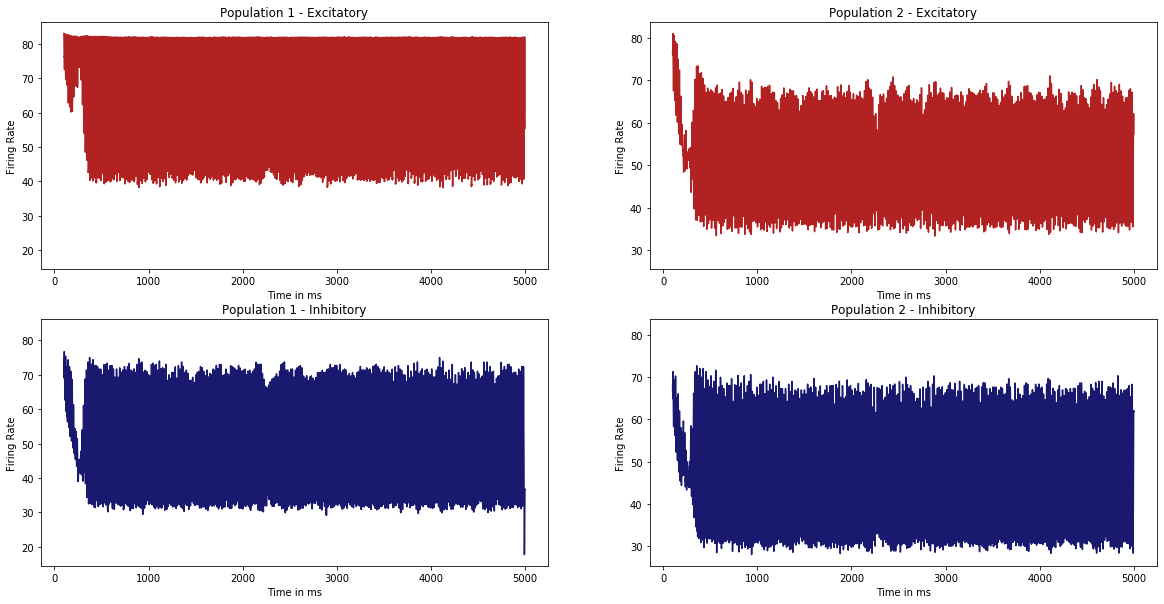

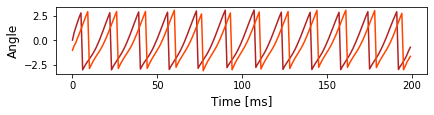

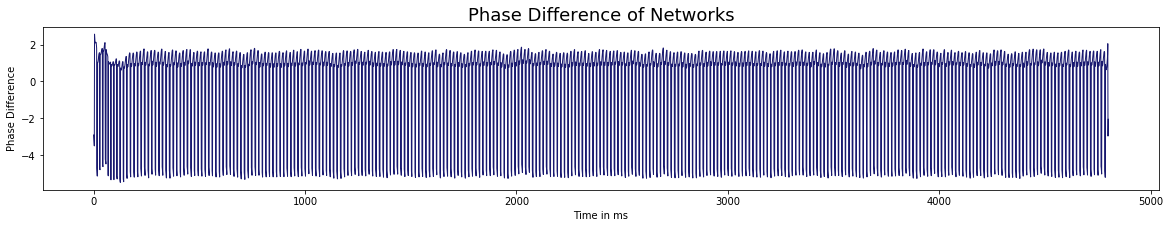

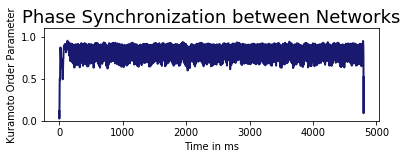

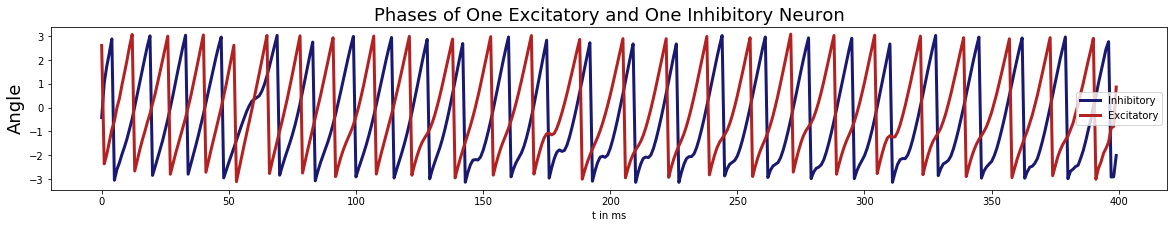

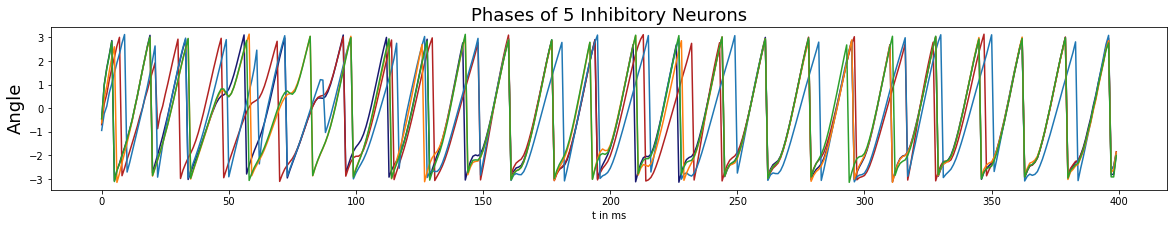

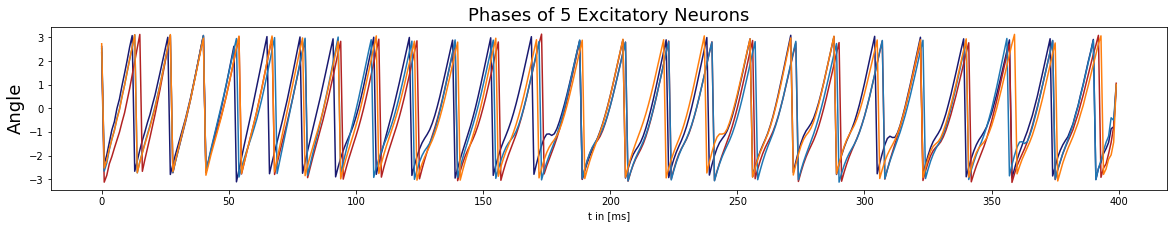

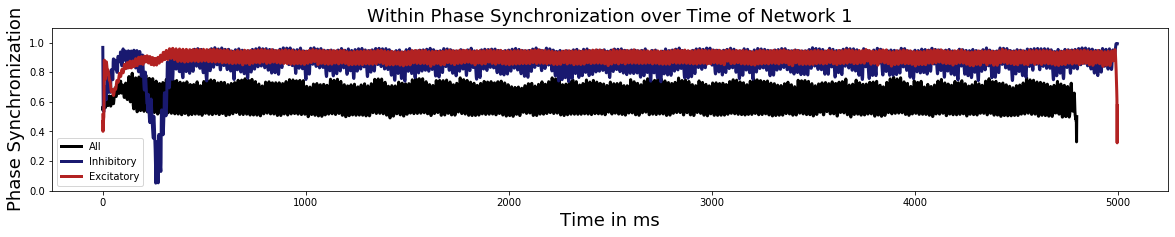

In [19]:
plots.plot_results(
    model, 
    pop_rates=True, 
    x_min_psd=20,
    x_max_psd=80, 
    full_raster=False, 
    phase_analysis=True, 
    folder="PING_strong_coupling", 
    save=True,     
    excerpt_x_left=500,
    excerpt_x_right=600,
    psd_group="EXC",
    psd_combine=True,
    show_lfp=False,)

200
50


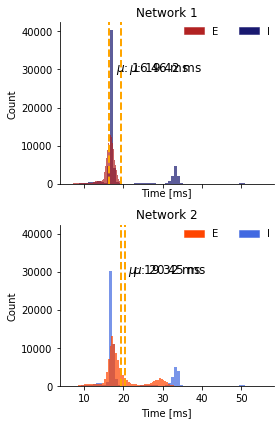

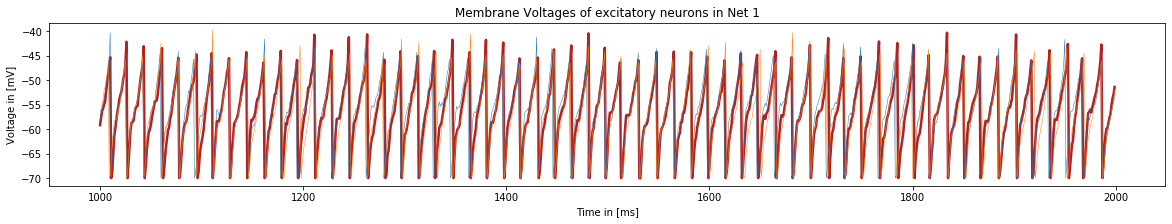

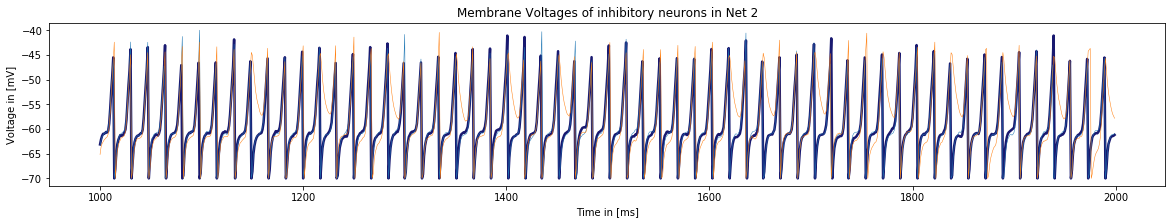

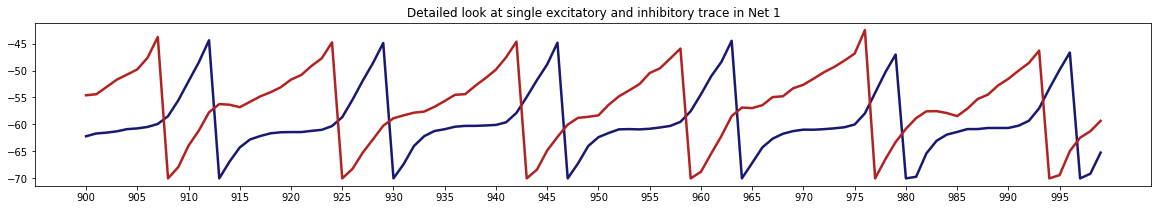

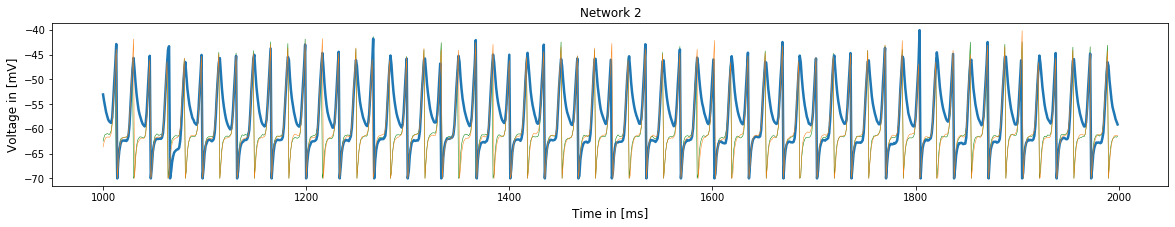

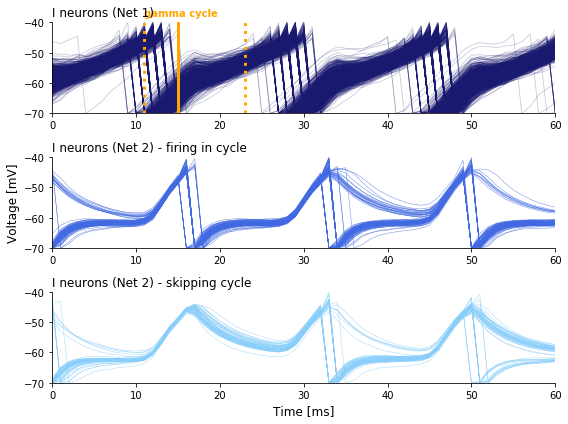

In [9]:
plots.isi_histograms(model, filter_outlier=True, folder="PING", key="coupling-synch")
plots.membrane_potentials_sample(model)

window=(930, 990)

v_e = model["v_all_neurons_e"]
v2 = model["v_all_neurons_i2"]

plots.spike_variability_analysis(v_e, v2, window=window, t_s=945, t_width=(4, 8), folder="PING", key="coupling-synch")

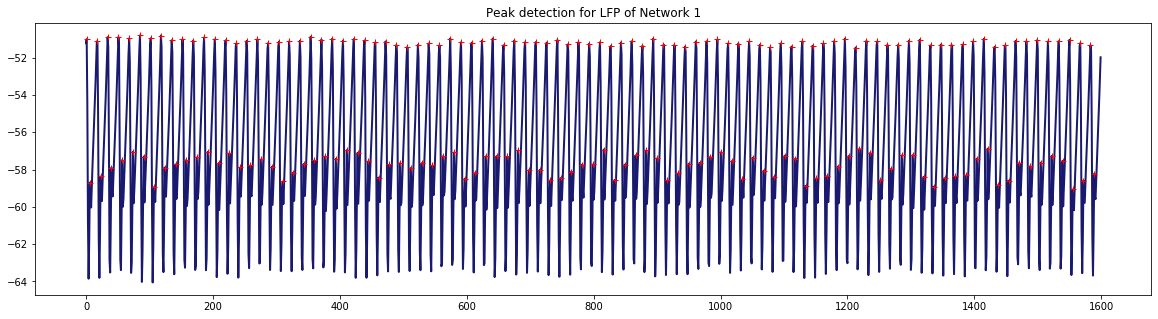

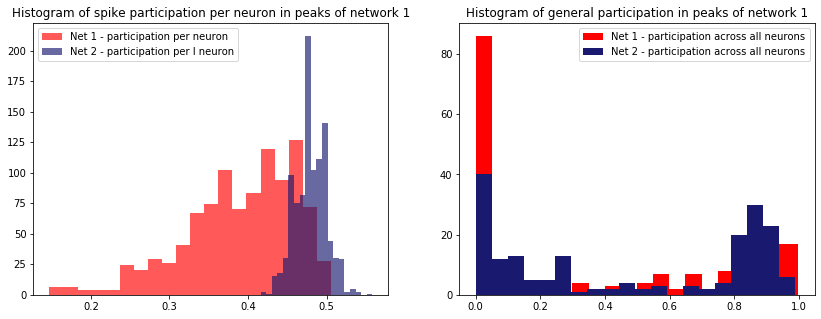

In [103]:
plots.spike_participation_histograms(model)

274 273


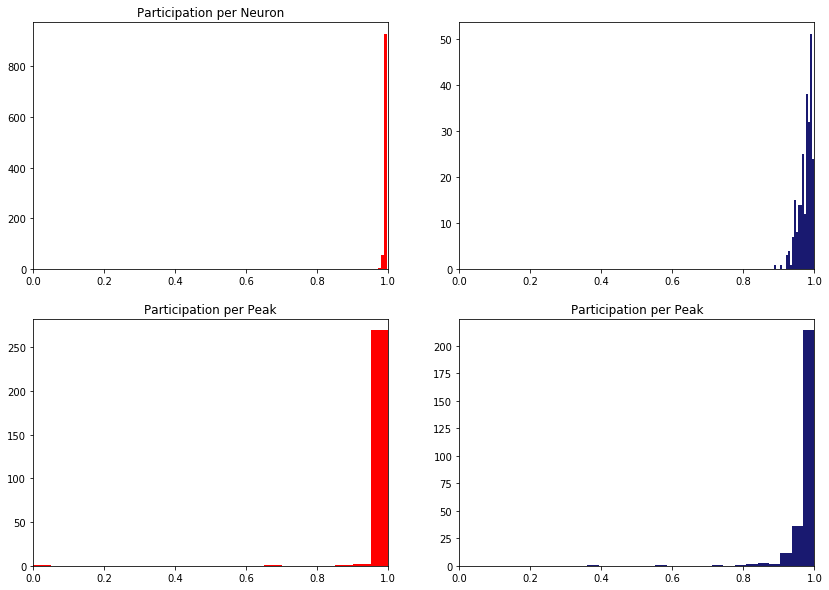

In [104]:
plots.spike_participation_histograms_per_network(model)

288 273


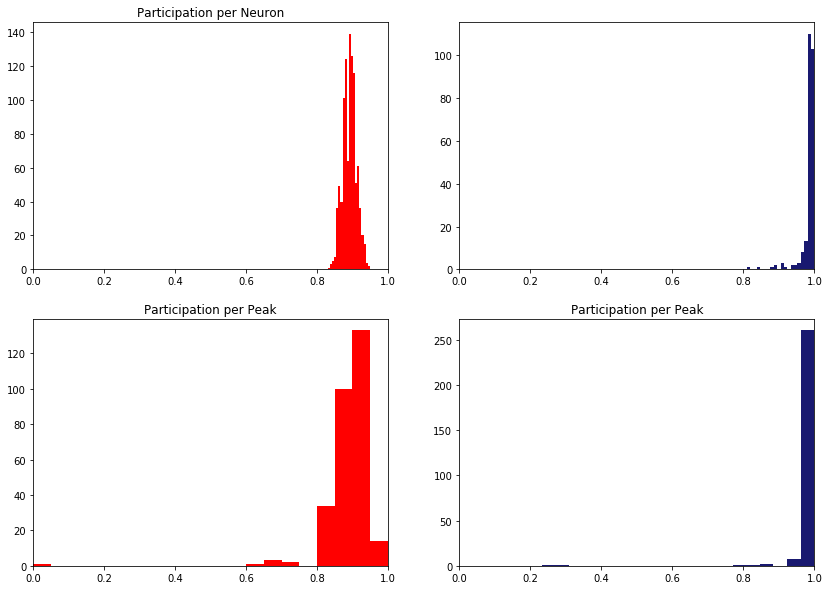

In [105]:
plots.spike_participation_histograms_per_network(model, network=2)

## **State 3** - Increased noise leads to synchronization

Synchronized activity across and unsynchronized activity within networks

In [10]:
params_mid = dict(params)
params_mid.update({
    "runtime": 5000,
    "poisson_variance": 4.5,
})

model = runner.run(
    modified_params=params_mid,
    file_name="PING_sparse_noise_synch",
    load=True
)

Average E firing frequency: 68.69875390985032
Average I firing frequency: 25.69879387316127
Global Order Parameter value of: 0.5782513201507682
Mean Phase Coherence 0.66472901021924
Computing within synchronization for network 1 and 2
Within Synchronization of Network 1 0.1782598738941973
Within Synchronization of Network 2 0.17946547420665937


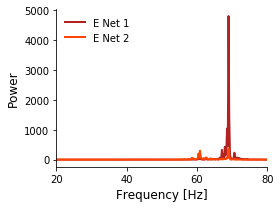

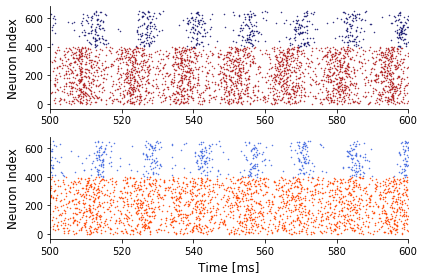

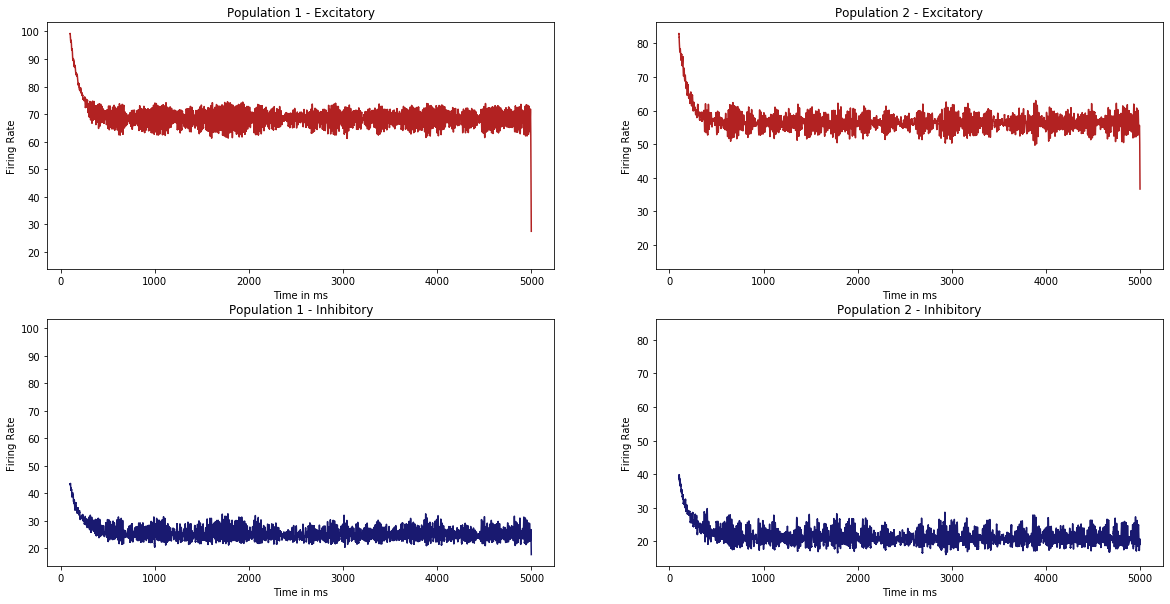

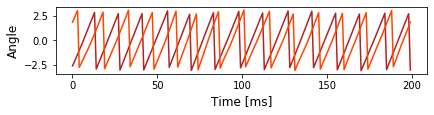

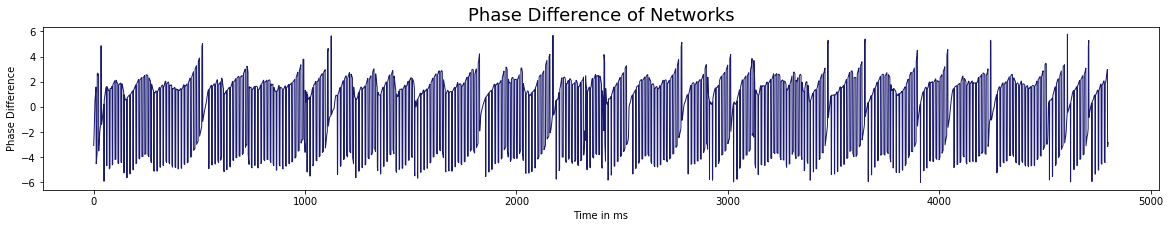

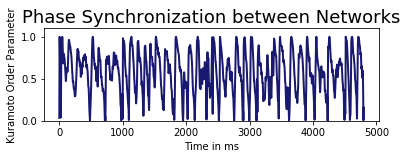

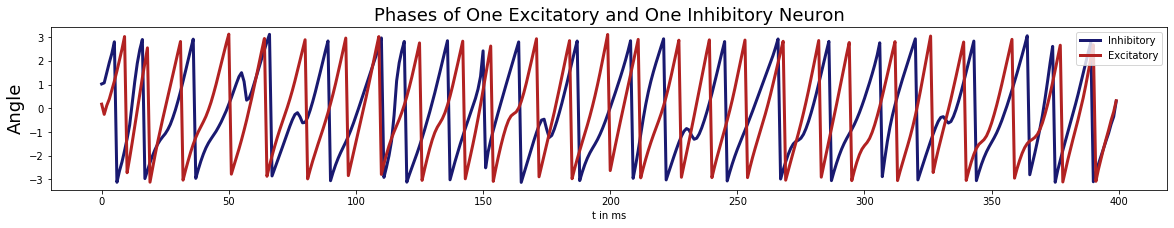

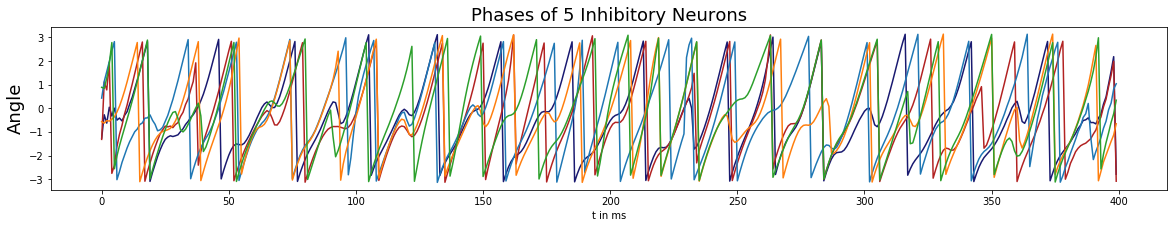

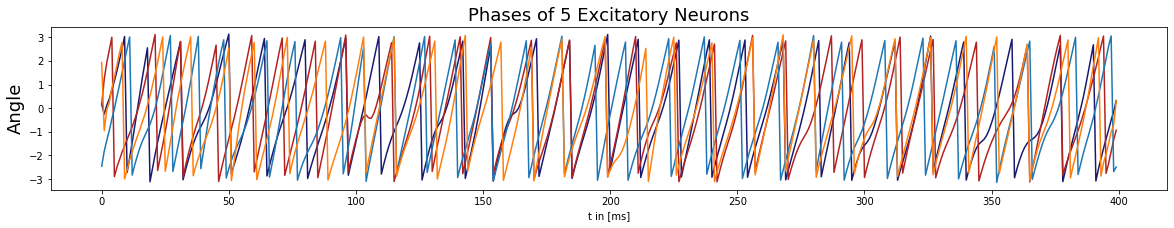

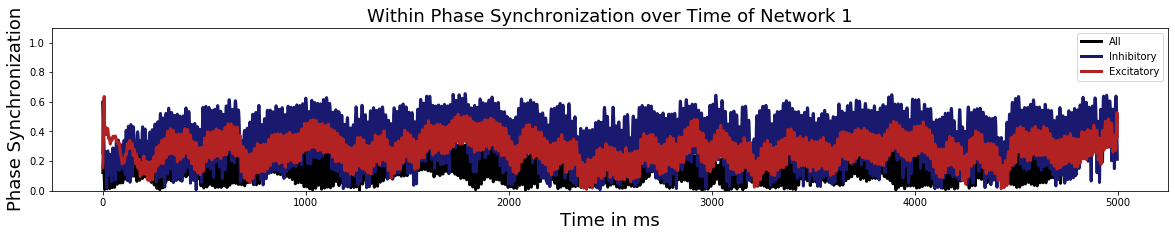

In [11]:
plots.plot_results(model, pop_rates=True, x_min_psd=20, x_max_psd=80, full_raster=False, phase_analysis=True, folder="PING_strong_noise", save=True,
    excerpt_x_left=500,
    excerpt_x_right=600,
    psd_group="EXC",
    psd_combine=True,
    show_lfp=False,
)

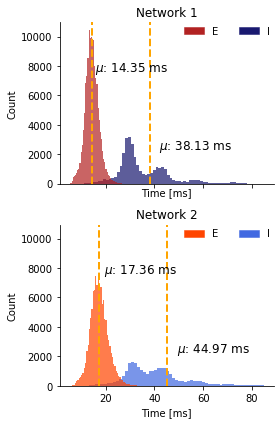

In [12]:
plots.isi_histograms(model, filter_outlier=True, folder="PING", key="noise-synch")

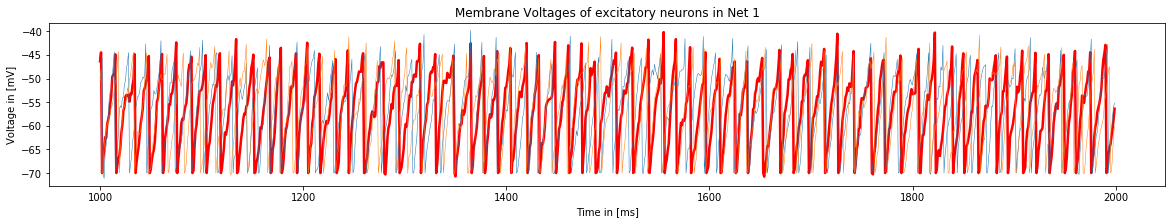

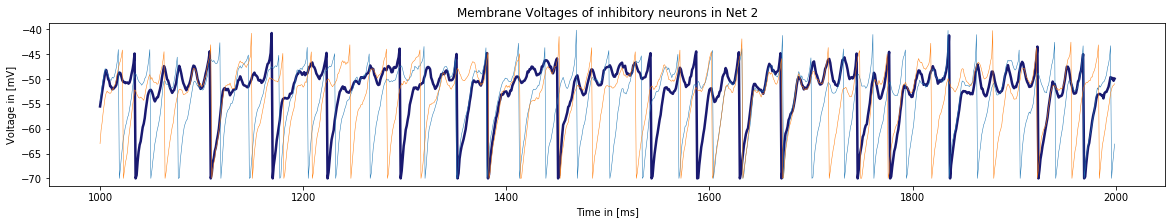

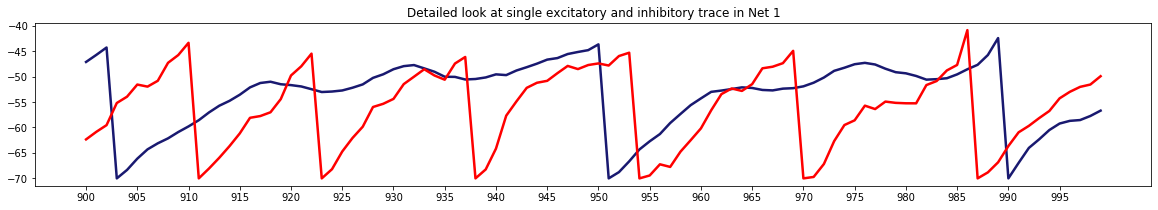

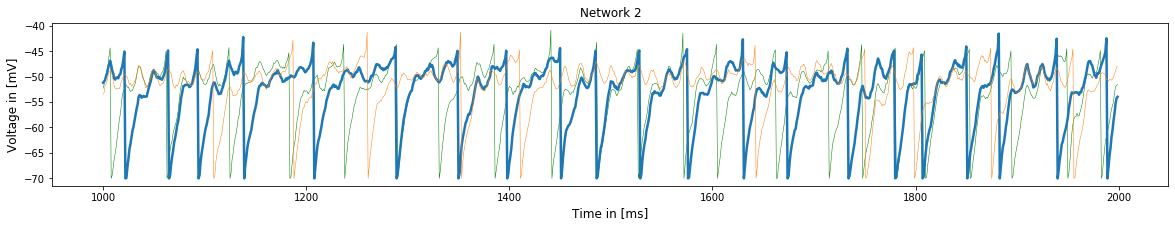

In [143]:
plots.membrane_potentials_sample(model)

80
170


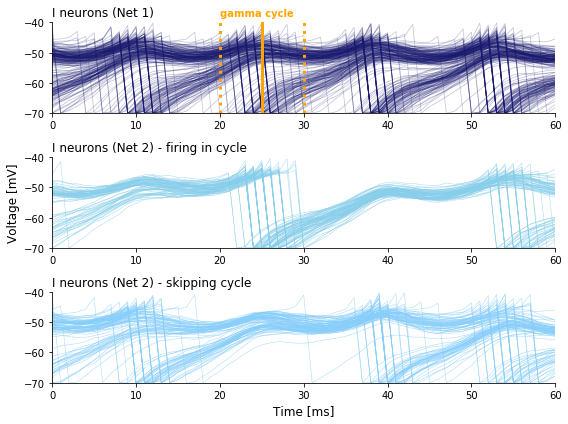

In [144]:
window=(560, 620)

# inhibitory neurons
v1 = model["v_all_neurons_i1"]
v2 = model["v_all_neurons_i2"]

plots.spike_variability_analysis(v1, v2, window=window, t_s=585, t_width=(5, 5), folder="PING_test", key="noise-synch")

345 349


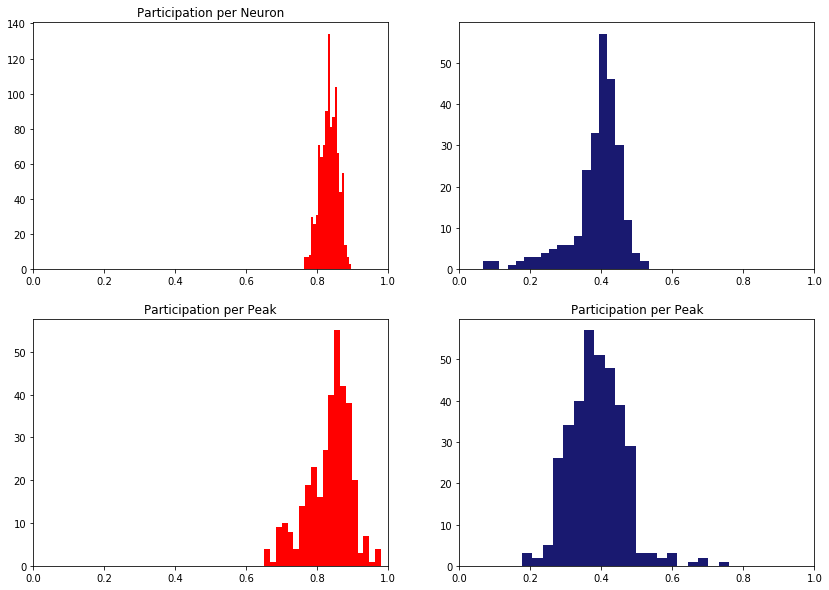

In [145]:
plots.spike_participation_histograms_per_network(model)

608 423


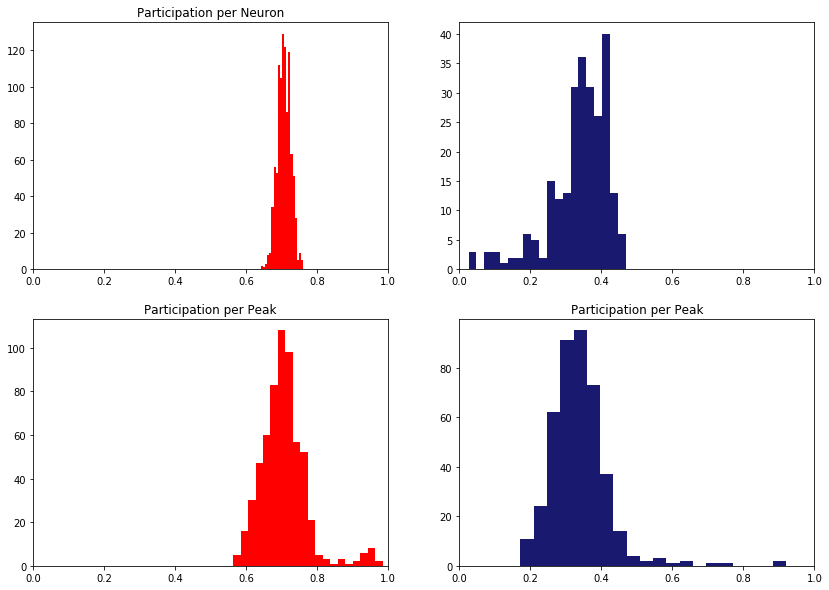

In [146]:
plots.spike_participation_histograms_per_network(model, network=2)

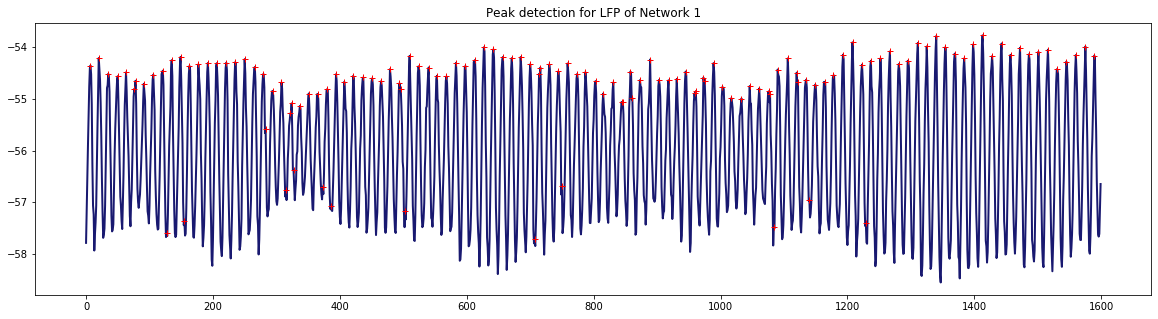

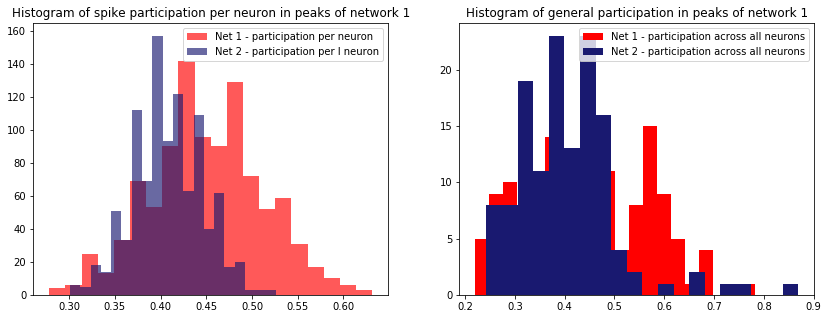

In [147]:
plots.spike_participation_histograms(model)

## **State 4** - Strong Noise and Strong Coupling

* Synchronized, but noisy

In [ ]:
params_mid = dict(params)
params_mid.update({
    "runtime": 5000,
    "poisson_variance": 4.5,
    "J_ppei": 0.07,
})

model = runner.run(
    modified_params=params_mid,
    file_name="PING_sparse_str_coupling_str_noise",
    load=False
)

In [ ]:
plots.plot_results(model, pop_rates=True, x_min_psd=20, x_max_psd=90, full_raster=False, phase_analysis=True, folder="PING_strong_coupling_strong_noise", save=True)

## Strong Noise - Detrimental Effect

In [6]:
params_mid = dict(params)
params_mid.update({
    "runtime": 5000,
    "poisson_variance": 12.0
})

model = runner.run(
    modified_params=params_mid,
    file_name="PING_sparse_very_str_noise",
    load=False
)

Starting simulation at t=0. s for a duration of 5. s
1.1293 s (22%) simulated in 10s, estimated 34s remaining.
2.1966 s (43%) simulated in 20s, estimated 26s remaining.
3.2366 s (64%) simulated in 30s, estimated 16s remaining.
4.31365 s (86%) simulated in 40s, estimated 6s remaining.
5. s (100%) simulated in 46s


'\nGlobal Order Parameter value of: 0.6501930532320742\nMean Phase Coherence 0.30714835353141884\nComputing within synchronization for network 1 and 2\nWithin Synchronization of Network 1 0.12652517132326355\nWithin Synchronization of Network 2 0.16158838728668531\n'

Global Order Parameter value of: 0.6442559234154686
Mean Phase Coherence 0.13584046729082366
Computing within synchronization for network 1 and 2
Within Synchronization of Network 1 0.12523190243265483
Within Synchronization of Network 2 0.1557554147490139


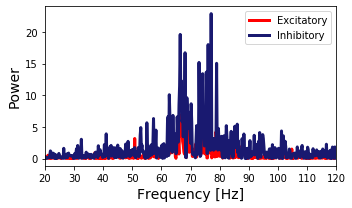

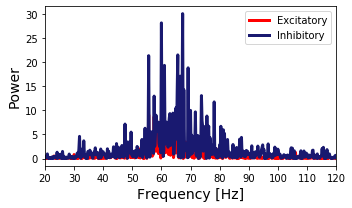

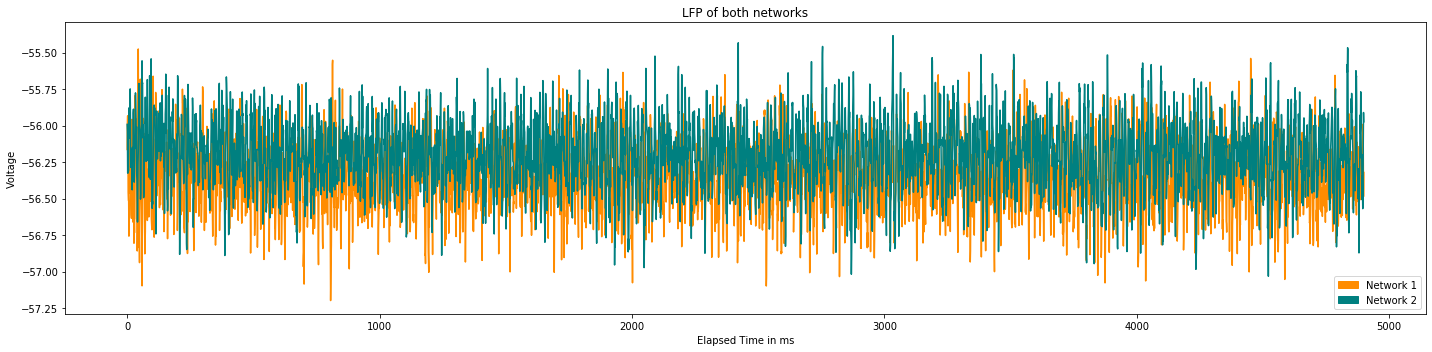

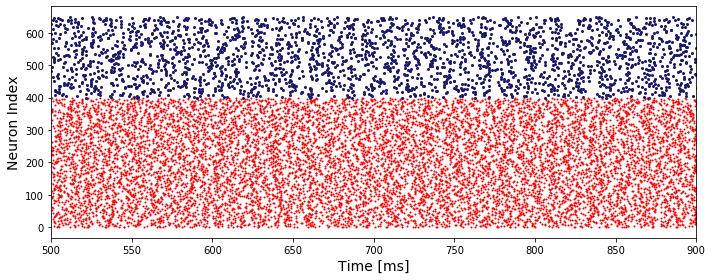

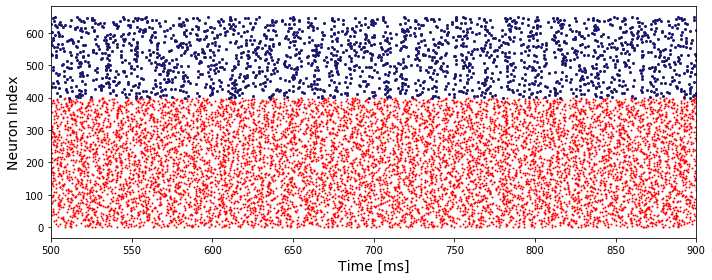

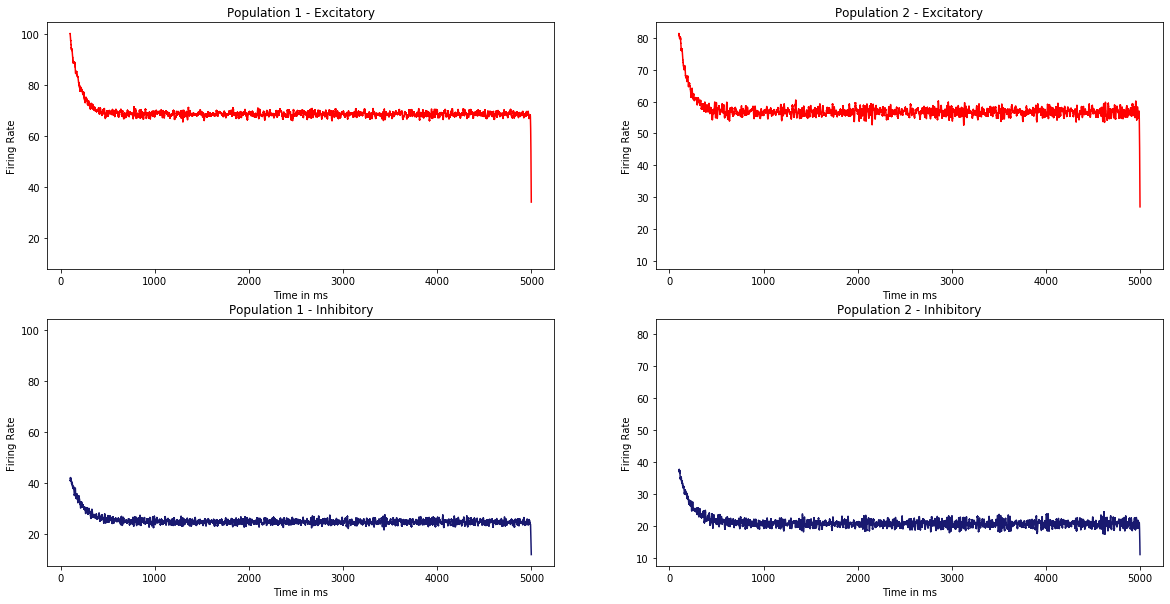

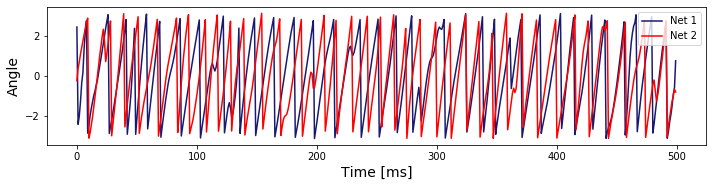

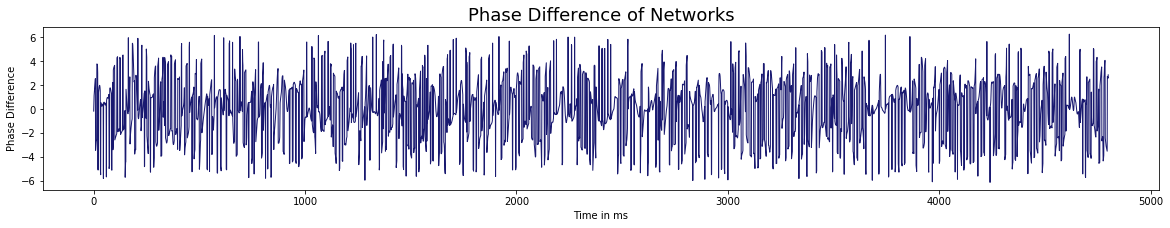

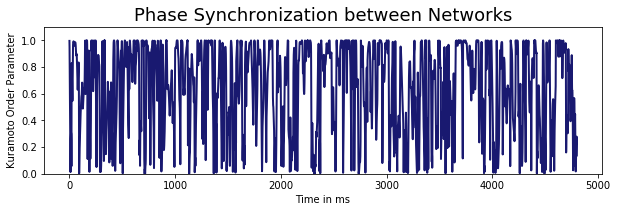

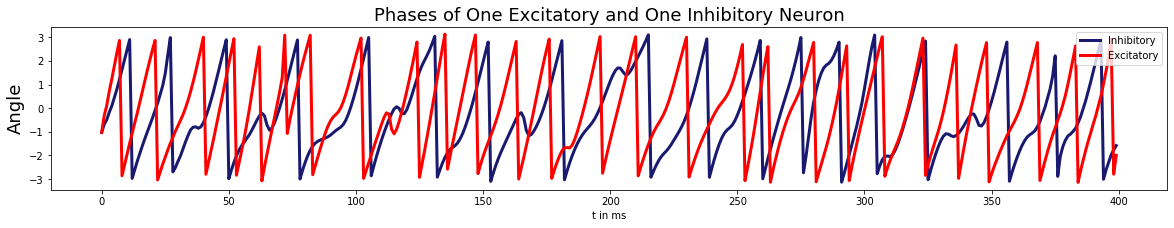

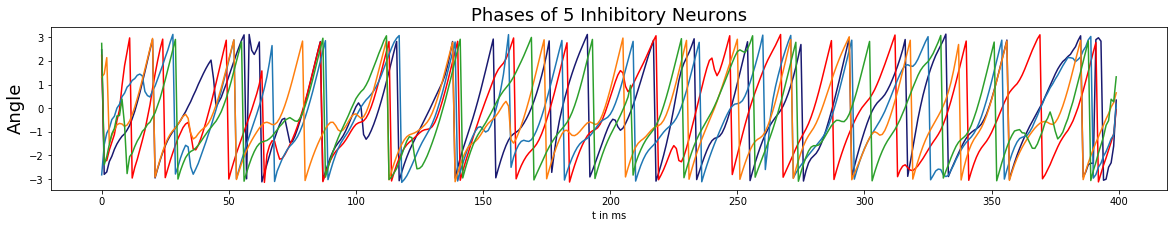

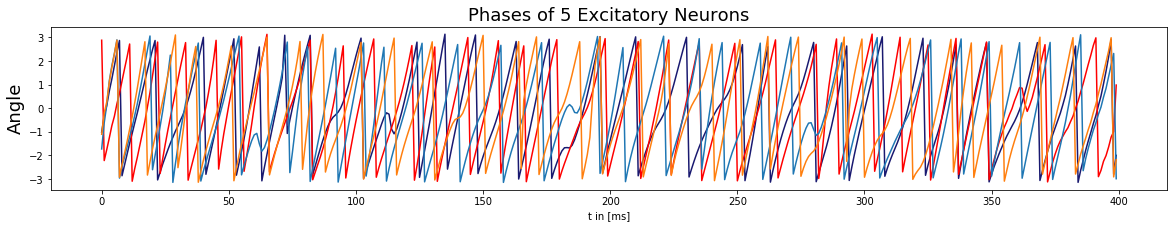

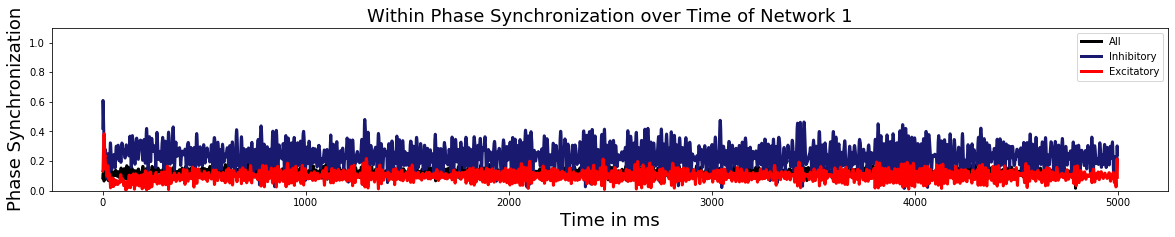

In [7]:
plots.plot_results(model, pop_rates=True, x_min_psd=20, x_max_psd=120, full_raster=False, phase_analysis=True, folder="PING_very_strong_noise", save=True)

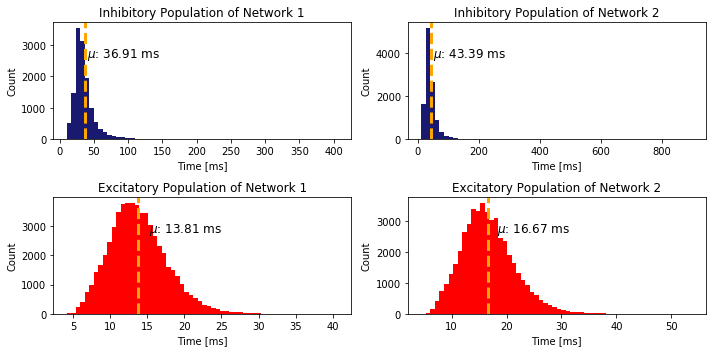

In [7]:
plots.isi_histograms(model)

# Explorations

## Single Param Exploration

* too much excitation if strength is high

In [3]:
exp_params = {
    "poisson_variance": np.arange(0.5, 9.0, 0.1),
}

ov_params = dict(params)
ov_params.update({
     "runtime": 5000.0,
})

ex = mopet.Exploration(
    runner.run_in_mopet, 
    explore_params=exp_params, 
    default_params=ov_params,
    hdf_filename=constants.MODELS_PATH + "/PING_sparse.h5",
    exploration_name="exp_3"
)

In [15]:
ex.run()

2020-09-04 11:33:36,884	INFO resource_spec.py:212 -- Starting Ray with 8.94 GiB memory available for workers and up to 4.48 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-09-04 11:33:37,121	WARNING services.py:923 -- Redis failed to start, retrying now.
2020-09-04 11:33:37,382	INFO services.py:1165 -- View the Ray dashboard at localhost:8265
INFO:root:Starting 85 jobs.
100%|██████████| 85/85 [00:00<00:00, 702.04it/s]
INFO:root:Runs took 0.12407398223876953 s to submit.
  0%|          | 0/85 [00:00<?, ?it/s]

(pid=9530) Starting simulation at t=0. s for a duration of 5. s
(pid=9534) Starting simulation at t=0. s for a duration of 5. s
(pid=9526) Starting simulation at t=0. s for a duration of 5. s
(pid=9535) Starting simulation at t=0. s for a duration of 5. s
(pid=9533) Starting simulation at t=0. s for a duration of 5. s
(pid=9531) Starting simulation at t=0. s for a duration of 5. s
(pid=9530) 0.4304 s (8%) simulated in 10s, estimated 1m 46s remaining.
(pid=9536) Starting simulation at t=0. s for a duration of 5. s
(pid=9527) Starting simulation at t=0. s for a duration of 5. s
(pid=9528) Starting simulation at t=0. s for a duration of 5. s
(pid=9532) Starting simulation at t=0. s for a duration of 5. s
(pid=9525) Starting simulation at t=0. s for a duration of 5. s
(pid=9529) Starting simulation at t=0. s for a duration of 5. s
(pid=9534) 0.3343 s (6%) simulated in 10s, estimated 2m 20s remaining.
(pid=9526) 0.3208 s (6%) simulated in 10s, estimated 2m 26s remaining.
(pid=9535) 315.35 m

  6%|▌         | 5/85 [03:58<1:16:01, 57.01s/it] 

(pid=9535) Starting simulation at t=0. s for a duration of 5. s


  7%|▋         | 6/85 [03:58<52:46, 40.08s/it]  

(pid=9533) Starting simulation at t=0. s for a duration of 5. s


  8%|▊         | 7/85 [03:59<36:55, 28.41s/it]

(pid=9526) Starting simulation at t=0. s for a duration of 5. s


 11%|█         | 9/85 [04:01<18:07, 14.31s/it]

(pid=9530) 0.31785 s (6%) simulated in 10s, estimated 2m 27s remaining.


 12%|█▏        | 10/85 [04:01<12:46, 10.22s/it]

(pid=9534) 0.32115 s (6%) simulated in 10s, estimated 2m 26s remaining.


 14%|█▍        | 12/85 [04:03<06:32,  5.37s/it]

(pid=9527) Starting simulation at t=0. s for a duration of 5. s
(pid=9531) Starting simulation at t=0. s for a duration of 5. s
(pid=9525) Starting simulation at t=0. s for a duration of 5. s
(pid=9535) 0.3397 s (6%) simulated in 10s, estimated 2m 17s remaining.
(pid=9533) 0.3434 s (6%) simulated in 10s, estimated 2m 16s remaining.
(pid=9526) 0.3595 s (7%) simulated in 10s, estimated 2m 9s remaining.
(pid=9532) Starting simulation at t=0. s for a duration of 5. s
(pid=9530) 0.6896 s (13%) simulated in 20s, estimated 2m 5s remaining.
(pid=9534) 0.70025 s (14%) simulated in 20s, estimated 2m 3s remaining.
(pid=9528) Starting simulation at t=0. s for a duration of 5. s
(pid=9527) 0.37735 s (7%) simulated in 10s, estimated 2m 3s remaining.
(pid=9536) Starting simulation at t=0. s for a duration of 5. s
(pid=9531) 0.3769 s (7%) simulated in 10s, estimated 2m 3s remaining.
(pid=9529) Starting simulation at t=0. s for a duration of 5. s
(pid=9525) 0.345 s (6%) simulated in 10s, estimated 2m 1

 16%|█▋        | 14/85 [07:12<50:14, 42.46s/it]  

(pid=9534) Starting simulation at t=0. s for a duration of 5. s


 20%|██        | 17/85 [07:27<19:29, 17.19s/it]

(pid=9534) 0.32975 s (6%) simulated in 10s, estimated 2m 22s remaining.
(pid=9535) Starting simulation at t=0. s for a duration of 5. s
(pid=9530) Starting simulation at t=0. s for a duration of 5. s
(pid=9533) Starting simulation at t=0. s for a duration of 5. s


 21%|██        | 18/85 [07:36<16:23, 14.68s/it]

(pid=9527) Starting simulation at t=0. s for a duration of 5. s


 28%|██▊       | 24/85 [07:40<02:17,  2.26s/it]

(pid=9534) 0.6779 s (13%) simulated in 20s, estimated 2m 8s remaining.
(pid=9526) Starting simulation at t=0. s for a duration of 5. s
(pid=9535) 0.3465 s (6%) simulated in 10s, estimated 2m 14s remaining.
(pid=9530) 0.34935 s (6%) simulated in 10s, estimated 2m 13s remaining.
(pid=9533) 0.34295 s (6%) simulated in 10s, estimated 2m 16s remaining.
(pid=9525) Starting simulation at t=0. s for a duration of 5. s
(pid=9531) Starting simulation at t=0. s for a duration of 5. s
(pid=9527) 0.35005 s (7%) simulated in 10s, estimated 2m 13s remaining.
(pid=9529) Starting simulation at t=0. s for a duration of 5. s
(pid=9536) Starting simulation at t=0. s for a duration of 5. s
(pid=9534) 1.0356 s (20%) simulated in 30s, estimated 1m 55s remaining.
(pid=9532) Starting simulation at t=0. s for a duration of 5. s
(pid=9526) 0.36205 s (7%) simulated in 10s, estimated 2m 8s remaining.
(pid=9535) 0.706 s (14%) simulated in 20s, estimated 2m 2s remaining.
(pid=9530) 0.7112 s (14%) simulated in 20s, e

 31%|███       | 26/85 [10:33<37:02, 37.67s/it]

(pid=9534) Starting simulation at t=0. s for a duration of 5. s


 32%|███▏      | 27/85 [10:34<25:45, 26.65s/it]

(pid=9527) Starting simulation at t=0. s for a duration of 5. s


 34%|███▍      | 29/85 [10:44<14:06, 15.12s/it]

(pid=9534) 0.32305 s (6%) simulated in 10s, estimated 2m 25s remaining.


 35%|███▌      | 30/85 [10:45<09:53, 10.80s/it]

(pid=9535) Starting simulation at t=0. s for a duration of 5. s


 36%|███▋      | 31/85 [10:47<07:33,  8.39s/it]

(pid=9533) Starting simulation at t=0. s for a duration of 5. s


 38%|███▊      | 32/85 [10:48<05:24,  6.12s/it]

(pid=9530) Starting simulation at t=0. s for a duration of 5. s
(pid=9531) Starting simulation at t=0. s for a duration of 5. s
(pid=9527) 0.32845 s (6%) simulated in 10s, estimated 2m 22s remaining.
(pid=9534) 0.667 s (13%) simulated in 20s, estimated 2m 10s remaining.
(pid=9525) Starting simulation at t=0. s for a duration of 5. s


 40%|████      | 34/85 [10:56<04:00,  4.71s/it]

(pid=9535) 0.33295 s (6%) simulated in 10s, estimated 2m 20s remaining.


 42%|████▏     | 36/85 [10:57<02:09,  2.64s/it]

(pid=9533) 0.3364 s (6%) simulated in 10s, estimated 2m 19s remaining.
(pid=9530) 0.34355 s (6%) simulated in 10s, estimated 2m 16s remaining.
(pid=9531) 0.33365 s (6%) simulated in 10s, estimated 2m 20s remaining.
(pid=9529) Starting simulation at t=0. s for a duration of 5. s
(pid=9527) 0.66165 s (13%) simulated in 20s, estimated 2m 11s remaining.
(pid=9526) Starting simulation at t=0. s for a duration of 5. s
(pid=9536) Starting simulation at t=0. s for a duration of 5. s
(pid=9534) 0.99765 s (19%) simulated in 30s, estimated 2m 0s remaining.
(pid=9525) 0.3251 s (6%) simulated in 10s, estimated 2m 24s remaining.
(pid=9535) 0.65645 s (13%) simulated in 20s, estimated 2m 12s remaining.
(pid=9533) 0.6664 s (13%) simulated in 20s, estimated 2m 10s remaining.
(pid=9528) Starting simulation at t=0. s for a duration of 5. s
(pid=9530) 0.66895 s (13%) simulated in 20s, estimated 2m 9s remaining.
(pid=9531) 0.6581 s (13%) simulated in 20s, estimated 2m 12s remaining.
(pid=9529) 0.31735 s (6%

 44%|████▎     | 37/85 [13:47<42:13, 52.79s/it]

(pid=9532) 5. s (100%) simulated in 2m 35s
(pid=9527) Starting simulation at t=0. s for a duration of 5. s
(pid=9534) Starting simulation at t=0. s for a duration of 5. s


 48%|████▊     | 41/85 [14:05<10:52, 14.82s/it]

(pid=9527) 267.75 ms (5%) simulated in 10s, estimated 2m 57s remaining.
(pid=9534) 266.45 ms (5%) simulated in 10s, estimated 2m 58s remaining.
(pid=9530) Starting simulation at t=0. s for a duration of 5. s
(pid=9531) Starting simulation at t=0. s for a duration of 5. s


 52%|█████▏    | 44/85 [14:20<05:00,  7.34s/it]

(pid=9527) 0.5675 s (11%) simulated in 20s, estimated 2m 36s remaining.


 53%|█████▎    | 45/85 [14:20<03:35,  5.38s/it]

(pid=9534) 0.5691 s (11%) simulated in 20s, estimated 2m 36s remaining.


 54%|█████▍    | 46/85 [14:21<02:33,  3.94s/it]

(pid=9525) Starting simulation at t=0. s for a duration of 5. s
(pid=9535) Starting simulation at t=0. s for a duration of 5. s
(pid=9533) Starting simulation at t=0. s for a duration of 5. s
(pid=9530) 0.3417 s (6%) simulated in 10s, estimated 2m 16s remaining.
(pid=9531) 0.34145 s (6%) simulated in 10s, estimated 2m 16s remaining.
(pid=9527) 0.92415 s (18%) simulated in 30s, estimated 2m 12s remaining.
(pid=9529) Starting simulation at t=0. s for a duration of 5. s
(pid=9534) 0.92465 s (18%) simulated in 30s, estimated 2m 12s remaining.


 56%|█████▋    | 48/85 [14:33<02:44,  4.44s/it]

(pid=9525) 0.35235 s (7%) simulated in 10s, estimated 2m 12s remaining.
(pid=9535) 0.34505 s (6%) simulated in 10s, estimated 2m 15s remaining.
(pid=9533) 0.34945 s (6%) simulated in 10s, estimated 2m 13s remaining.
(pid=9530) 0.69175 s (13%) simulated in 20s, estimated 2m 5s remaining.
(pid=9526) Starting simulation at t=0. s for a duration of 5. s
(pid=9531) 0.6919 s (13%) simulated in 20s, estimated 2m 5s remaining.
(pid=9536) Starting simulation at t=0. s for a duration of 5. s
(pid=9527) 1.2773 s (25%) simulated in 40s, estimated 1m 57s remaining.
(pid=9529) 0.3363 s (6%) simulated in 10s, estimated 2m 19s remaining.
(pid=9534) 1.26805 s (25%) simulated in 40s, estimated 1m 58s remaining.
(pid=9525) 0.6987 s (13%) simulated in 20s, estimated 2m 3s remaining.
(pid=9532) Starting simulation at t=0. s for a duration of 5. s
(pid=9528) Starting simulation at t=0. s for a duration of 5. s
(pid=9535) 0.6857 s (13%) simulated in 20s, estimated 2m 6s remaining.
(pid=9533) 0.6952 s (13%) s

 59%|█████▉    | 50/85 [17:07<20:11, 34.61s/it]

(pid=9528) 5. s (100%) simulated in 2m 24s
(pid=9532) 5. s (100%) simulated in 2m 25s
(pid=9534) Starting simulation at t=0. s for a duration of 5. s
(pid=9527) Starting simulation at t=0. s for a duration of 5. s


 60%|██████    | 51/85 [17:19<15:51, 27.98s/it]

(pid=9534) 290.9 ms (5%) simulated in 10s, estimated 2m 42s remaining.
(pid=9527) 307.55 ms (6%) simulated in 10s, estimated 2m 33s remaining.


 65%|██████▍   | 55/85 [17:34<04:13,  8.46s/it]

(pid=9534) 0.6389 s (12%) simulated in 20s, estimated 2m 17s remaining.
(pid=9530) Starting simulation at t=0. s for a duration of 5. s
(pid=9527) 0.66025 s (13%) simulated in 20s, estimated 2m 11s remaining.
(pid=9525) Starting simulation at t=0. s for a duration of 5. s


 66%|██████▌   | 56/85 [17:42<03:57,  8.20s/it]

(pid=9531) Starting simulation at t=0. s for a duration of 5. s


 67%|██████▋   | 57/85 [17:42<02:45,  5.92s/it]

(pid=9535) Starting simulation at t=0. s for a duration of 5. s


 68%|██████▊   | 58/85 [17:44<02:06,  4.67s/it]

(pid=9534) 1.00505 s (20%) simulated in 30s, estimated 1m 59s remaining.
(pid=9530) 0.3567 s (7%) simulated in 10s, estimated 2m 10s remaining.
(pid=9529) Starting simulation at t=0. s for a duration of 5. s
(pid=9533) Starting simulation at t=0. s for a duration of 5. s


 69%|██████▉   | 59/85 [17:48<01:56,  4.49s/it]

(pid=9527) 1.0196 s (20%) simulated in 30s, estimated 1m 57s remaining.


 71%|███████   | 60/85 [17:49<01:24,  3.38s/it]

(pid=9525) 0.3545 s (7%) simulated in 10s, estimated 2m 11s remaining.
(pid=9531) 0.36095 s (7%) simulated in 10s, estimated 2m 9s remaining.
(pid=9535) 0.3639 s (7%) simulated in 10s, estimated 2m 7s remaining.
(pid=9534) 1.3854 s (27%) simulated in 40s, estimated 1m 44s remaining.
(pid=9530) 0.73505 s (14%) simulated in 20s, estimated 1m 56s remaining.
(pid=9529) 0.37525 s (7%) simulated in 10s, estimated 2m 3s remaining.
(pid=9533) 0.3756 s (7%) simulated in 10s, estimated 2m 3s remaining.
(pid=9527) 1.40585 s (28%) simulated in 40s, estimated 1m 42s remaining.
(pid=9526) Starting simulation at t=0. s for a duration of 5. s
(pid=9525) 0.743 s (14%) simulated in 20s, estimated 1m 55s remaining.
(pid=9536) Starting simulation at t=0. s for a duration of 5. s
(pid=9531) 0.7469 s (14%) simulated in 20s, estimated 1m 54s remaining.
(pid=9528) Starting simulation at t=0. s for a duration of 5. s
(pid=9532) Starting simulation at t=0. s for a duration of 5. s
(pid=9535) 0.7484 s (14%) simu

 73%|███████▎  | 62/85 [20:34<13:57, 36.41s/it]

(pid=9526) 5. s (100%) simulated in 2m 37s
(pid=9536) 5. s (100%) simulated in 2m 38s
(pid=9528) 5. s (100%) simulated in 2m 38s
(pid=9532) 4.9716 s (99%) simulated in 2m 40s, estimated 1s remaining.
(pid=9532) 5. s (100%) simulated in 2m 41s
(pid=9527) Starting simulation at t=0. s for a duration of 5. s
(pid=9534) Starting simulation at t=0. s for a duration of 5. s


 74%|███████▍  | 63/85 [20:55<11:39, 31.80s/it]

(pid=9527) 248.4 ms (4%) simulated in 10s, estimated 3m 11s remaining.
(pid=9534) 234.7 ms (4%) simulated in 10s, estimated 3m 23s remaining.


 76%|███████▋  | 65/85 [21:06<05:59, 17.95s/it]

(pid=9527) 0.4769 s (9%) simulated in 20s, estimated 3m 10s remaining.
(pid=9534) 0.4746 s (9%) simulated in 20s, estimated 3m 11s remaining.


 79%|███████▉  | 67/85 [21:17<03:20, 11.11s/it]

(pid=9527) 0.7331 s (14%) simulated in 30s, estimated 2m 55s remaining.


 80%|████████  | 68/85 [21:17<02:16,  8.03s/it]

(pid=9530) Starting simulation at t=0. s for a duration of 5. s
(pid=9534) 0.7297 s (14%) simulated in 30s, estimated 2m 56s remaining.
(pid=9525) Starting simulation at t=0. s for a duration of 5. s
(pid=9527) 1.0064 s (20%) simulated in 40s, estimated 2m 39s remaining.
(pid=9530) 276.1 ms (5%) simulated in 10s, estimated 2m 51s remaining.


 81%|████████  | 69/85 [21:28<02:21,  8.84s/it]

(pid=9531) Starting simulation at t=0. s for a duration of 5. s


 84%|████████▎ | 71/85 [21:32<01:13,  5.24s/it]

(pid=9535) Starting simulation at t=0. s for a duration of 5. s
(pid=9534) 1.03175 s (20%) simulated in 40s, estimated 2m 34s remaining.


 85%|████████▍ | 72/85 [21:36<01:00,  4.69s/it]

(pid=9525) 306.1 ms (6%) simulated in 10s, estimated 2m 33s remaining.
(pid=9527) 1.31655 s (26%) simulated in 50s, estimated 2m 20s remaining.
(pid=9529) Starting simulation at t=0. s for a duration of 5. s
(pid=9533) Starting simulation at t=0. s for a duration of 5. s
(pid=9530) 0.5916 s (11%) simulated in 20s, estimated 2m 29s remaining.
(pid=9531) 0.31675 s (6%) simulated in 10s, estimated 2m 28s remaining.
(pid=9535) 0.3163 s (6%) simulated in 10s, estimated 2m 28s remaining.
(pid=9534) 1.35425 s (27%) simulated in 50s, estimated 2m 15s remaining.
(pid=9525) 0.63475 s (12%) simulated in 20s, estimated 2m 18s remaining.
(pid=9527) 1.6494 s (32%) simulated in 1m 0s, estimated 2m 2s remaining.
(pid=9529) 0.32645 s (6%) simulated in 10s, estimated 2m 23s remaining.
(pid=9533) 0.3235 s (6%) simulated in 10s, estimated 2m 25s remaining.
(pid=9530) 0.92225 s (18%) simulated in 30s, estimated 2m 13s remaining.
(pid=9526) Starting simulation at t=0. s for a duration of 5. s
(pid=9531) 0.6

 87%|████████▋ | 74/85 [24:27<07:02, 38.44s/it]

(pid=9526) 4.8825 s (97%) simulated in 2m 40s, estimated 4s remaining.
(pid=9536) 4.88205 s (97%) simulated in 2m 40s, estimated 4s remaining.
(pid=9526) 5. s (100%) simulated in 2m 43s
(pid=9528) 4.86715 s (97%) simulated in 2m 40s, estimated 4s remaining.
(pid=9536) 5. s (100%) simulated in 2m 43s
(pid=9532) 4.8334 s (96%) simulated in 2m 40s, estimated 6s remaining.
(pid=9528) 5. s (100%) simulated in 2m 43s
(pid=9532) 5. s (100%) simulated in 2m 45s
(pid=9527) Starting simulation at t=0. s for a duration of 5. s


 88%|████████▊ | 75/85 [24:44<05:18, 31.85s/it]

(pid=9527) 313.55 ms (6%) simulated in 10s, estimated 2m 29s remaining.


 92%|█████████▏| 78/85 [25:02<01:41, 14.50s/it]

(pid=9527) 0.6646 s (13%) simulated in 20s, estimated 2m 10s remaining.


 98%|█████████▊| 83/85 [25:12<00:07,  3.90s/it]

(pid=9527) 1.2443 s (24%) simulated in 30s, estimated 1m 31s remaining.


 99%|█████████▉| 84/85 [25:13<00:03,  3.23s/it]

(pid=9527) 2.2141 s (44%) simulated in 40s, estimated 50s remaining.
(pid=9527) 3.40745 s (68%) simulated in 50s, estimated 23s remaining.
(pid=9527) 4.6015 s (92%) simulated in 1m 0s, estimated 5s remaining.
(pid=9527) 5. s (100%) simulated in 1m 3s


100%|██████████| 85/85 [25:57<00:00, 18.32s/it]
INFO:root:Runs and storage took 1557.4423878192902 s to complete.


In [4]:
ex.load_results(all=True)

INFO:root:/Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/models/PING_sparse.h5 opened for reading.
INFO:root:Gettings runs of exploration ``exp_3``
100%|██████████| 85/85 [00:18<00:00,  4.58it/s]
INFO:root:Creating new results DataFrame
INFO:root:Aggregating scalar results ...
100%|██████████| 85/85 [00:20<00:00,  4.10it/s]
INFO:root:/Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/models/PING_sparse.h5 closed.


### Results

{'J_etoe': 0.01,
 'J_etoi': 0.05,
 'J_itoe': 0.5,
 'J_itoi': 0.7,
 'J_ppee': 0.01,
 'J_ppei': 0.03,
 'N_pop': 2,
 'const_delay': 0.0,
 'net_record_spikes': 400,
 'ou_enabled': [False, False],
 'p_etoe': 0.2,
 'p_etoi': 0.4,
 'p_itoe': 0.4,
 'p_itoi': 0.4,
 'p_ppee': 0.1,
 'p_ppei': 0.4,
 'p_ppii': 0.0,
 'poisson_I_enabled': True,
 'poisson_I_ratio': 0.4,
 'poisson_enabled': [True, True],
 'poisson_mean_input': 300,
 'poisson_p': 0.84,
 'poisson_size': 800,
 'poisson_variance': 1.0,
 'runtime': 5000.0}


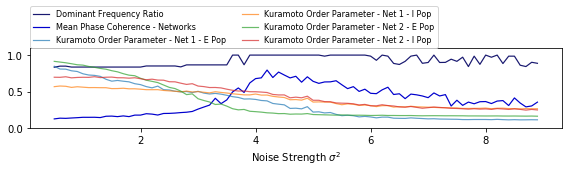

In [7]:
import pprint

plots.plot_exploration(ex, vmin_ratio=None, vmin_phase=None, vmax_phase=None, folder="PING_sparse")
pprint.pprint(ex.default_params)

INFO:root:/Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/models/PING_sparse.h5 opened for reading.


Global Order Parameter value of: 0.5888209853138631
Mean Phase Coherence 0.14126178680525153
Computing within synchronization for network 1 and 2
Within Synchronization of Network 1 0.4726593794545414
Within Synchronization of Network 2 0.5619276294739142


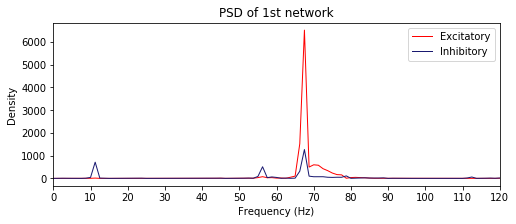

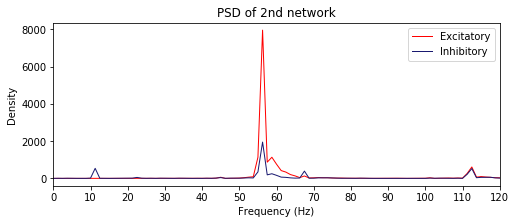

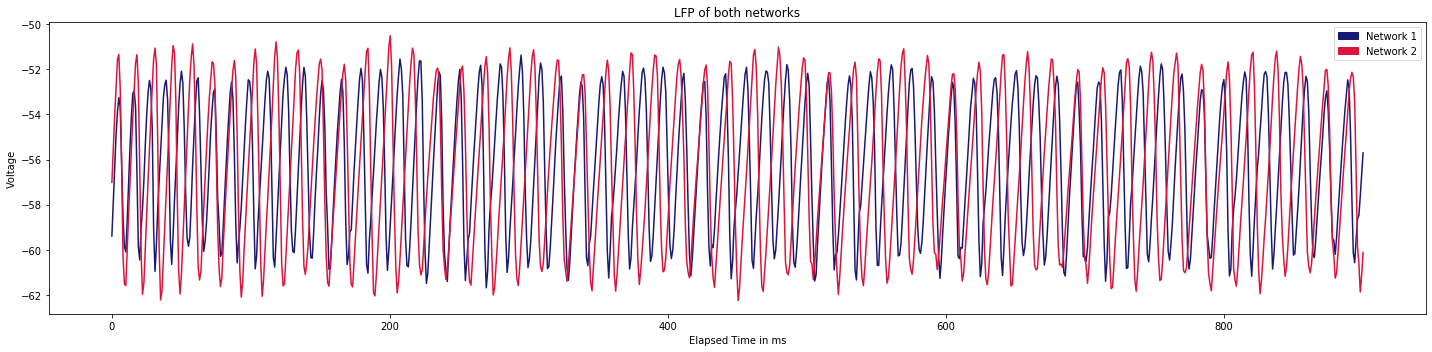

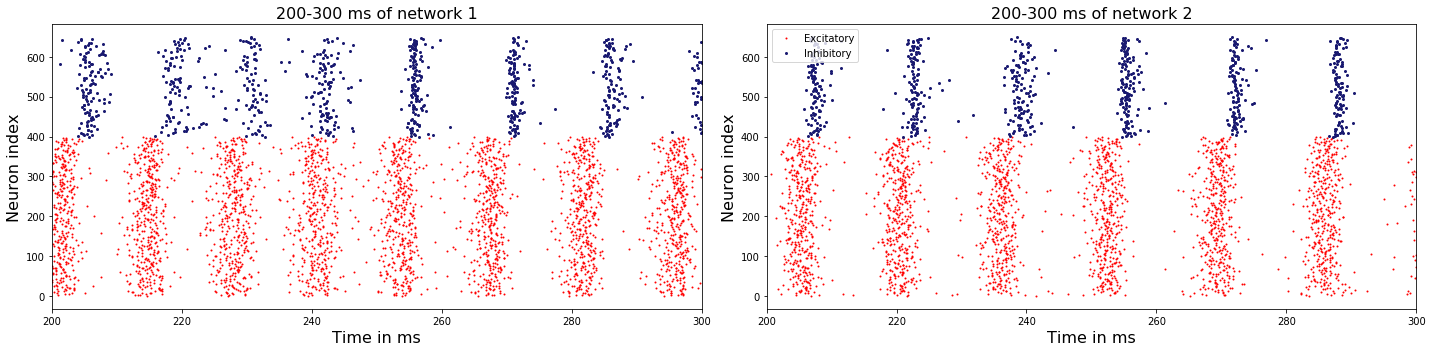

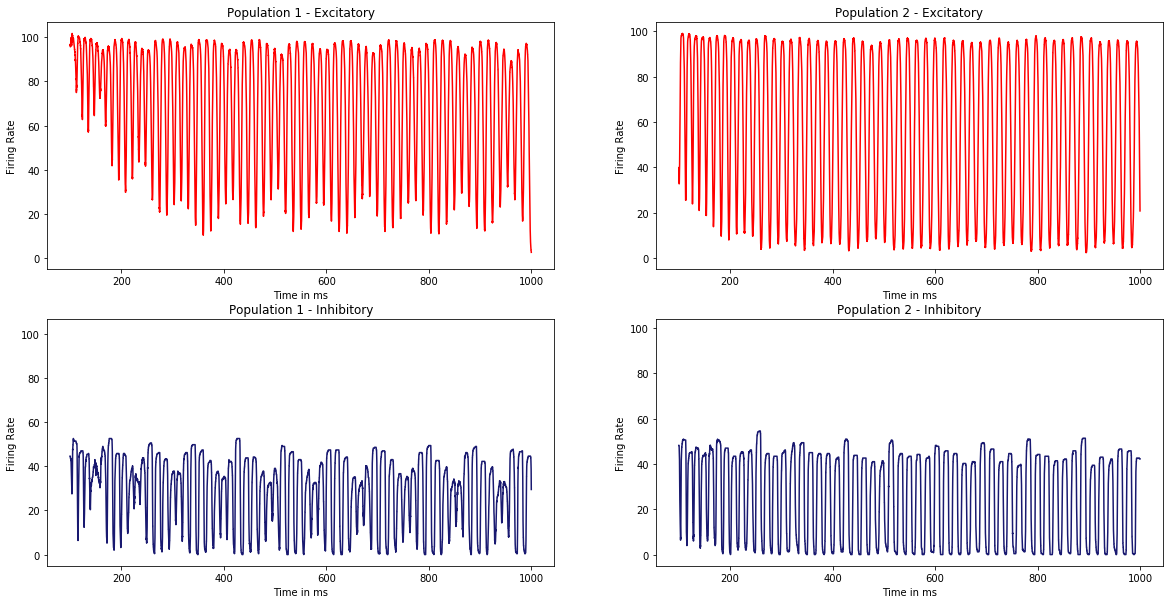

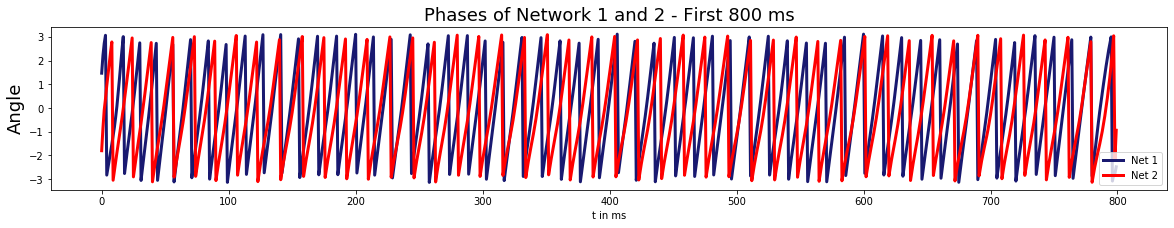

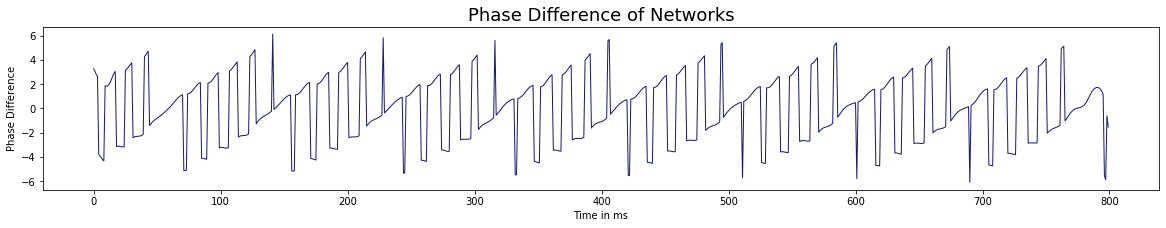

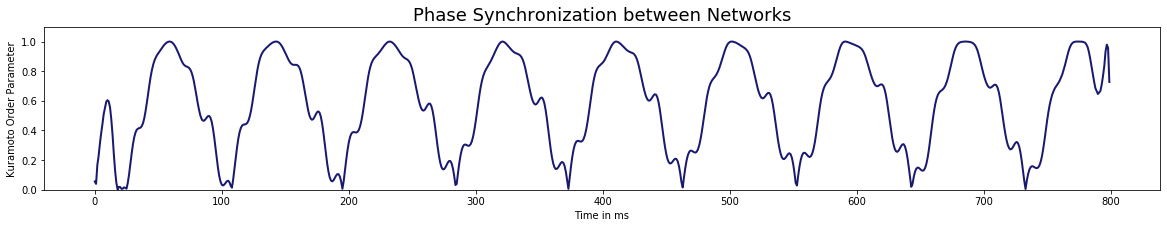

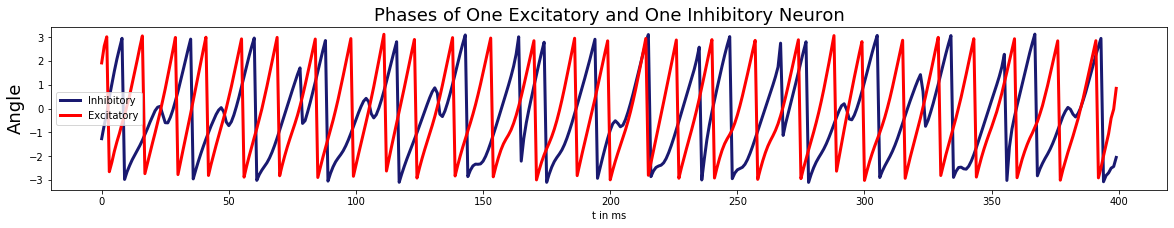

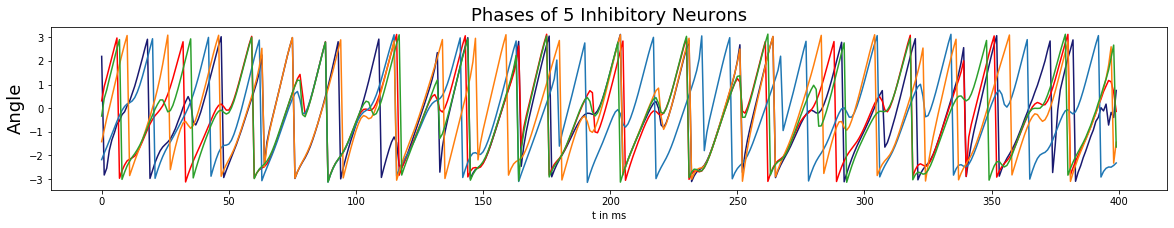

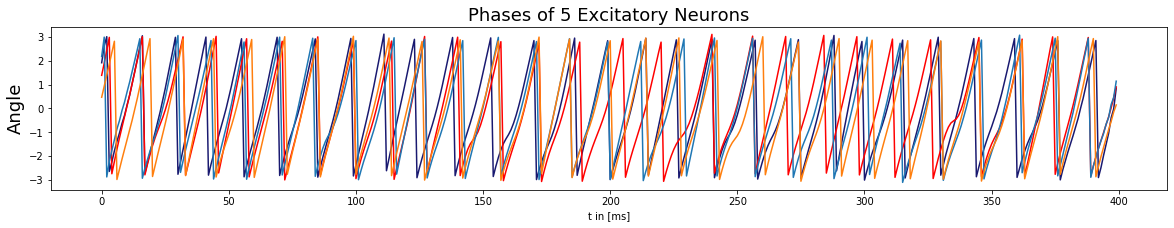

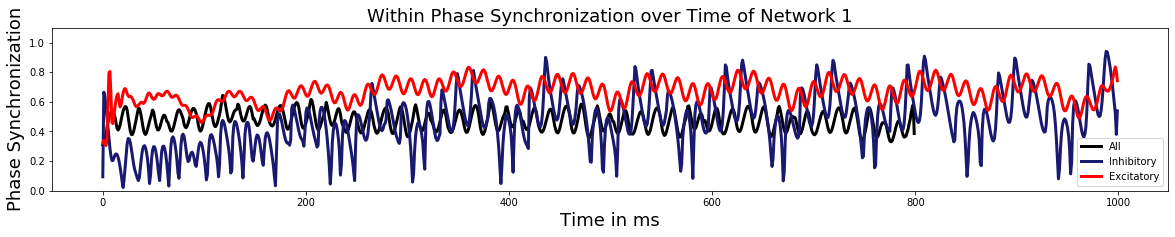

In [225]:
plots.plot_results(ex.get_run(5))

In [226]:
print(ex.params[5])
ex.default_params

{'poisson_variance': 1.5000000000000004}


{'runtime': 1000.0,
 'J_itoi': 0.7,
 'J_etoe': 0.01,
 'J_etoi': 0.05,
 'J_itoe': 0.5,
 'J_ppee': 0.001,
 'J_ppei': 0.03,
 'p_ppee': 0.0,
 'p_ppei': 0.4,
 'p_ppii': 0.0,
 'p_etoi': 0.4,
 'p_etoe': 0.2,
 'p_itoe': 0.4,
 'p_itoi': 0.4,
 'ou_enabled': [False, False],
 'poisson_enabled': [True, True],
 'poisson_variance': 1.0,
 'poisson_p': 0.84,
 'poisson_size': 800,
 'poisson_mean_input': 300,
 'N_pop': 2,
 'net_record_spikes': 400,
 'poisson_I_ratio': 0.4,
 'poisson_I_enabled': True,
 'const_delay': 0.0}

## Noise strength and ratio - Exploration

In [69]:
exp_params = {
    "poisson_variance": np.arange(0.5, 10.0, 0.5),
    "poisson_p": np.arange(0.7, 1.0, 0.05),
}

ov_params = dict(params)
ov_params.update({
    "runtime": 1000
})

ex = mopet.Exploration(
    runner.run_in_mopet, 
    explore_params=exp_params, 
    default_params=ov_params,
    hdf_filename=constants.MODELS_PATH + "/PING_sparse_2d.h5",
    exploration_name="exp_2"
)

In [228]:
ex.run()

2020-07-23 11:20:15,725	INFO resource_spec.py:212 -- Starting Ray with 10.99 GiB memory available for workers and up to 5.51 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-07-23 11:20:15,976	WARNING services.py:923 -- Redis failed to start, retrying now.
2020-07-23 11:20:16,150	INFO services.py:1165 -- View the Ray dashboard at localhost:8265
INFO:root:Starting 133 jobs.
100%|██████████| 133/133 [00:00<00:00, 561.44it/s]
INFO:root:Runs took 0.23984098434448242 s to submit.
  0%|          | 0/133 [00:00<?, ?it/s]

(pid=8077) Starting simulation at t=0. s for a duration of 1. s
(pid=8069) Starting simulation at t=0. s for a duration of 1. s
(pid=8077) 0.6495 s (64%) simulated in 10s, estimated 5s remaining.
(pid=8077) INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]
(pid=8077) 1. s (100%) simulated in 13s
(pid=8069) 0.7924 s (79%) simulated in 10s, estimated 3s remaining.
(pid=8077) Starting simulation at t=0. s for a duration of 1. s
(pid=8069) 1. s (100%) simulated in 12s
(pid=8069) INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]
(pid=8069) Starting simulation at t=0. s for a duration of 1. s
(pid=8075) Starting simulation at t=0. s for a duration of 1. s
(pid=8076) Starting simulation at t=0. s for a duration of 1. s
(pid=8078) Starting simulation at t=0. s for a duration of 1. s
(pid=8072) Starting simulation at t=0. s for a duration of 1. s
(pid=8067) Starting simulation at t=0. s for a duration of 1

  2%|▏         | 2/133 [00:59<1:30:32, 41.47s/it]

(pid=8070) 1. s (100%) simulated in 24s
(pid=8070) INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]
(pid=8068) 1. s (100%) simulated in 24s
(pid=8068) INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]
(pid=8078) Starting simulation at t=0. s for a duration of 1. s
(pid=8071) 0.81815 s (81%) simulated in 20s, estimated 4s remaining.
(pid=8073) 1. s (100%) simulated in 25s
(pid=8073) INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]
(pid=8067) Starting simulation at t=0. s for a duration of 1. s
(pid=8077) Starting simulation at t=0. s for a duration of 1. s
(pid=8074) 0.76875 s (76%) simulated in 20s, estimated 6s remaining.
(pid=8071) 1. s (100%) simulated in 24s
(pid=8071) INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]
(pid=8075) 0.3948 s (39%) simulated in 10s, estimated 15s remaining.
(pid=8072) Starti

  3%|▎         | 4/133 [01:11<49:15, 22.91s/it]  

(pid=8078) 0.38695 s (38%) simulated in 10s, estimated 16s remaining.


  8%|▊         | 11/133 [01:12<04:12,  2.07s/it]

(pid=8067) 0.38915 s (38%) simulated in 10s, estimated 16s remaining.
(pid=8077) 0.3908 s (39%) simulated in 10s, estimated 16s remaining.


 11%|█         | 14/133 [01:16<02:24,  1.21s/it]

(pid=8069) Starting simulation at t=0. s for a duration of 1. s
(pid=8070) Starting simulation at t=0. s for a duration of 1. s
(pid=8075) 0.77595 s (77%) simulated in 20s, estimated 6s remaining.
(pid=8068) Starting simulation at t=0. s for a duration of 1. s
(pid=8072) 0.37565 s (37%) simulated in 10s, estimated 17s remaining.
(pid=8076) 0.3689 s (36%) simulated in 10s, estimated 17s remaining.
(pid=8073) 0.3698 s (36%) simulated in 10s, estimated 17s remaining.
(pid=8078) 0.75445 s (75%) simulated in 20s, estimated 7s remaining.
(pid=8071) Starting simulation at t=0. s for a duration of 1. s
(pid=8067) 0.75175 s (75%) simulated in 20s, estimated 7s remaining.
(pid=8077) 0.75095 s (75%) simulated in 20s, estimated 7s remaining.
(pid=8075) 1. s (100%) simulated in 26s
(pid=8074) Starting simulation at t=0. s for a duration of 1. s
(pid=8069) 0.36445 s (36%) simulated in 10s, estimated 17s remaining.
(pid=8070) 0.36525 s (36%) simulated in 10s, estimated 17s remaining.
(pid=8068) 0.360

 12%|█▏        | 16/133 [01:34<08:55,  4.57s/it]

(pid=8072) 1. s (100%) simulated in 27s
(pid=8074) 0.363 s (36%) simulated in 10s, estimated 18s remaining.
(pid=8076) 1. s (100%) simulated in 27s
(pid=8078) Starting simulation at t=0. s for a duration of 1. s
(pid=8069) 0.73745 s (73%) simulated in 20s, estimated 7s remaining.
(pid=8073) 1. s (100%) simulated in 27s
(pid=8070) 0.74295 s (74%) simulated in 20s, estimated 7s remaining.
(pid=8067) Starting simulation at t=0. s for a duration of 1. s
(pid=8068) 0.7408 s (74%) simulated in 20s, estimated 7s remaining.
(pid=8077) Starting simulation at t=0. s for a duration of 1. s
(pid=8075) 0.38225 s (38%) simulated in 10s, estimated 16s remaining.
(pid=8071) 0.75385 s (75%) simulated in 20s, estimated 7s remaining.
(pid=8072) Starting simulation at t=0. s for a duration of 1. s
(pid=8076) Starting simulation at t=0. s for a duration of 1. s
(pid=8069) 1. s (100%) simulated in 26s
(pid=8070) 1. s (100%) simulated in 26s
(pid=8073) Starting simulation at t=0. s for a duration of 1. s
(pi

 15%|█▌        | 20/133 [01:48<04:52,  2.59s/it]

(pid=8071) 1. s (100%) simulated in 26s


 18%|█▊        | 24/133 [01:49<01:24,  1.29it/s]

(pid=8077) 0.3778 s (37%) simulated in 10s, estimated 16s remaining.
(pid=8070) Starting simulation at t=0. s for a duration of 1. s
(pid=8075) 0.7609 s (76%) simulated in 20s, estimated 6s remaining.
(pid=8074) 1. s (100%) simulated in 26s
(pid=8072) 0.384 s (38%) simulated in 10s, estimated 16s remaining.
(pid=8076) 0.375 s (37%) simulated in 10s, estimated 17s remaining.


 19%|█▉        | 25/133 [01:53<03:09,  1.76s/it]

(pid=8073) 0.36335 s (36%) simulated in 10s, estimated 18s remaining.
(pid=8078) 0.763 s (76%) simulated in 20s, estimated 6s remaining.


 20%|█▉        | 26/133 [01:57<04:01,  2.26s/it]

(pid=8067) 0.7701 s (77%) simulated in 20s, estimated 6s remaining.
(pid=8075) 1. s (100%) simulated in 26s
(pid=8077) 0.7626 s (76%) simulated in 20s, estimated 6s remaining.
(pid=8070) 0.39365 s (39%) simulated in 10s, estimated 15s remaining.
(pid=8078) 1. s (100%) simulated in 25s


 20%|██        | 27/133 [02:02<05:38,  3.19s/it]

(pid=8072) 0.77795 s (77%) simulated in 20s, estimated 6s remaining.
(pid=8067) 1. s (100%) simulated in 25s
(pid=8076) 0.7596 s (75%) simulated in 20s, estimated 6s remaining.
(pid=8073) 0.74885 s (74%) simulated in 20s, estimated 7s remaining.
(pid=8068) Starting simulation at t=0. s for a duration of 1. s
(pid=8069) Starting simulation at t=0. s for a duration of 1. s
(pid=8075) Starting simulation at t=0. s for a duration of 1. s
(pid=8074) Starting simulation at t=0. s for a duration of 1. s


 21%|██        | 28/133 [02:07<06:20,  3.62s/it]

(pid=8077) 1. s (100%) simulated in 26s


 22%|██▏       | 29/133 [02:07<04:42,  2.72s/it]

(pid=8071) Starting simulation at t=0. s for a duration of 1. s
(pid=8072) 1. s (100%) simulated in 25s
(pid=8076) 1. s (100%) simulated in 26s
(pid=8078) Starting simulation at t=0. s for a duration of 1. s
(pid=8073) 1. s (100%) simulated in 26s
(pid=8070) 0.7688 s (76%) simulated in 20s, estimated 6s remaining.


 24%|██▍       | 32/133 [02:14<03:40,  2.18s/it]

(pid=8068) 0.37825 s (37%) simulated in 10s, estimated 16s remaining.
(pid=8069) 0.37435 s (37%) simulated in 10s, estimated 17s remaining.
(pid=8075) 0.37935 s (37%) simulated in 10s, estimated 16s remaining.


 25%|██▍       | 33/133 [02:15<03:06,  1.86s/it]

(pid=8072) Starting simulation at t=0. s for a duration of 1. s
(pid=8074) 0.37895 s (37%) simulated in 10s, estimated 16s remaining.
(pid=8076) Starting simulation at t=0. s for a duration of 1. s
(pid=8067) Starting simulation at t=0. s for a duration of 1. s
(pid=8070) 1. s (100%) simulated in 25s
(pid=8071) 0.38465 s (38%) simulated in 10s, estimated 16s remaining.
(pid=8078) 0.39025 s (39%) simulated in 10s, estimated 16s remaining.
(pid=8068) 0.77825 s (77%) simulated in 20s, estimated 6s remaining.
(pid=8069) 0.77475 s (77%) simulated in 20s, estimated 6s remaining.
(pid=8075) 0.786 s (78%) simulated in 20s, estimated 5s remaining.
(pid=8073) Starting simulation at t=0. s for a duration of 1. s
(pid=8072) 0.41245 s (41%) simulated in 10s, estimated 14s remaining.
(pid=8074) 0.78475 s (78%) simulated in 20s, estimated 5s remaining.
(pid=8076) 0.4095 s (40%) simulated in 10s, estimated 14s remaining.
(pid=8067) 0.4096 s (40%) simulated in 10s, estimated 14s remaining.
(pid=8071) 0

 27%|██▋       | 36/133 [02:35<05:44,  3.56s/it]

(pid=8073) 0.41475 s (41%) simulated in 10s, estimated 14s remaining.
(pid=8072) 0.84365 s (84%) simulated in 20s, estimated 4s remaining.


 28%|██▊       | 37/133 [02:36<04:48,  3.01s/it]

(pid=8068) Starting simulation at t=0. s for a duration of 1. s


 29%|██▊       | 38/133 [02:37<03:24,  2.15s/it]

(pid=8075) Starting simulation at t=0. s for a duration of 1. s
(pid=8076) 0.82265 s (82%) simulated in 20s, estimated 4s remaining.
(pid=8067) 0.8295 s (82%) simulated in 20s, estimated 4s remaining.


 29%|██▉       | 39/133 [02:37<02:26,  1.56s/it]

(pid=8069) Starting simulation at t=0. s for a duration of 1. s


 30%|███       | 40/133 [02:39<02:33,  1.65s/it]

(pid=8072) 1. s (100%) simulated in 23s
(pid=8067) 1. s (100%) simulated in 24s
(pid=8076) 1. s (100%) simulated in 24s
(pid=8077) 0.3914 s (39%) simulated in 10s, estimated 16s remaining.
(pid=8070) 0.39205 s (39%) simulated in 10s, estimated 16s remaining.
(pid=8073) 0.8114 s (81%) simulated in 20s, estimated 5s remaining.


 31%|███       | 41/133 [02:45<04:52,  3.18s/it]

(pid=8068) 0.39645 s (39%) simulated in 10s, estimated 15s remaining.
(pid=8075) 0.3908 s (39%) simulated in 10s, estimated 16s remaining.
(pid=8072) Starting simulation at t=0. s for a duration of 1. s
(pid=8069) 0.3918 s (39%) simulated in 10s, estimated 16s remaining.
(pid=8076) Starting simulation at t=0. s for a duration of 1. s
(pid=8067) Starting simulation at t=0. s for a duration of 1. s
(pid=8073) 1. s (100%) simulated in 25s
(pid=8078) Starting simulation at t=0. s for a duration of 1. s
(pid=8077) 0.78355 s (78%) simulated in 20s, estimated 6s remaining.
(pid=8070) 0.7893 s (78%) simulated in 20s, estimated 5s remaining.
(pid=8074) Starting simulation at t=0. s for a duration of 1. s
(pid=8068) 0.79115 s (79%) simulated in 20s, estimated 5s remaining.
(pid=8075) 0.7819 s (78%) simulated in 20s, estimated 6s remaining.
(pid=8072) 0.39095 s (39%) simulated in 10s, estimated 16s remaining.
(pid=8069) 0.7819 s (78%) simulated in 20s, estimated 6s remaining.
(pid=8077) 1. s (100

 32%|███▏      | 43/133 [03:03<07:47,  5.19s/it]

(pid=8075) 1. s (100%) simulated in 25s


 34%|███▍      | 45/133 [03:03<03:52,  2.64s/it]

(pid=8069) 1. s (100%) simulated in 25s


 35%|███▍      | 46/133 [03:04<03:16,  2.26s/it]

(pid=8074) 0.36065 s (36%) simulated in 10s, estimated 18s remaining.
(pid=8072) 0.75955 s (75%) simulated in 20s, estimated 6s remaining.


 37%|███▋      | 49/133 [03:08<01:52,  1.34s/it]

(pid=8070) Starting simulation at t=0. s for a duration of 1. s
(pid=8073) 0.36085 s (36%) simulated in 10s, estimated 18s remaining.
(pid=8076) 0.76035 s (76%) simulated in 20s, estimated 6s remaining.
(pid=8067) 0.7594 s (75%) simulated in 20s, estimated 6s remaining.
(pid=8071) 0.36625 s (36%) simulated in 10s, estimated 17s remaining.
(pid=8075) Starting simulation at t=0. s for a duration of 1. s
(pid=8068) Starting simulation at t=0. s for a duration of 1. s
(pid=8069) Starting simulation at t=0. s for a duration of 1. s
(pid=8078) 0.74555 s (74%) simulated in 20s, estimated 7s remaining.
(pid=8072) 1. s (100%) simulated in 26s
(pid=8077) Starting simulation at t=0. s for a duration of 1. s
(pid=8076) 1. s (100%) simulated in 26s
(pid=8067) 1. s (100%) simulated in 26s
(pid=8074) 0.74255 s (74%) simulated in 20s, estimated 7s remaining.
(pid=8070) 0.38885 s (38%) simulated in 10s, estimated 16s remaining.
(pid=8073) 0.74275 s (74%) simulated in 20s, estimated 7s remaining.
(pid=8

 38%|███▊      | 50/133 [03:26<09:05,  6.57s/it]

(pid=8070) 0.7952 s (79%) simulated in 20s, estimated 5s remaining.


 42%|████▏     | 56/133 [03:30<01:21,  1.06s/it]

(pid=8072) 0.40425 s (40%) simulated in 10s, estimated 15s remaining.
(pid=8075) 0.7918 s (79%) simulated in 20s, estimated 5s remaining.
(pid=8068) 0.8 s (80%) simulated in 20s, estimated 5s remaining.
(pid=8069) 0.7939 s (79%) simulated in 20s, estimated 5s remaining.
(pid=8073) Starting simulation at t=0. s for a duration of 1. s
(pid=8076) 0.3963 s (39%) simulated in 10s, estimated 15s remaining.
(pid=8067) 0.4014 s (40%) simulated in 10s, estimated 15s remaining.
(pid=8078) Starting simulation at t=0. s for a duration of 1. s
(pid=8070) 1. s (100%) simulated in 25s
(pid=8077) 0.80275 s (80%) simulated in 20s, estimated 5s remaining.
(pid=8068) 1. s (100%) simulated in 24s
(pid=8075) 1. s (100%) simulated in 25s
(pid=8069) 1. s (100%) simulated in 25s
(pid=8077) 1. s (100%) simulated in 24s
(pid=8071) Starting simulation at t=0. s for a duration of 1. s
(pid=8072) 0.8161 s (81%) simulated in 20s, estimated 5s remaining.
(pid=8070) Starting simulation at t=0. s for a duration of 1. 

 44%|████▍     | 59/133 [03:43<02:49,  2.30s/it]

(pid=8074) Starting simulation at t=0. s for a duration of 1. s


 46%|████▌     | 61/133 [03:43<01:28,  1.23s/it]

(pid=8072) 1. s (100%) simulated in 24s
(pid=8077) Starting simulation at t=0. s for a duration of 1. s
(pid=8067) 1. s (100%) simulated in 25s
(pid=8076) 1. s (100%) simulated in 25s
(pid=8071) 0.37055 s (37%) simulated in 10s, estimated 17s remaining.


 47%|████▋     | 62/133 [03:50<03:13,  2.72s/it]

(pid=8069) Starting simulation at t=0. s for a duration of 1. s
(pid=8070) 0.37375 s (37%) simulated in 10s, estimated 17s remaining.
(pid=8073) 0.7637 s (76%) simulated in 20s, estimated 6s remaining.


 48%|████▊     | 64/133 [03:52<02:03,  1.79s/it]

(pid=8078) 0.77535 s (77%) simulated in 20s, estimated 6s remaining.
(pid=8068) 0.36965 s (36%) simulated in 10s, estimated 17s remaining.
(pid=8075) 0.36585 s (36%) simulated in 10s, estimated 17s remaining.
(pid=8072) Starting simulation at t=0. s for a duration of 1. s
(pid=8074) 0.37225 s (37%) simulated in 10s, estimated 17s remaining.
(pid=8076) Starting simulation at t=0. s for a duration of 1. s
(pid=8077) 0.37005 s (37%) simulated in 10s, estimated 17s remaining.
(pid=8078) 1. s (100%) simulated in 25s
(pid=8073) 1. s (100%) simulated in 26s
(pid=8071) 0.7455 s (74%) simulated in 20s, estimated 7s remaining.
(pid=8069) 0.3754 s (37%) simulated in 10s, estimated 17s remaining.
(pid=8070) 0.7531 s (75%) simulated in 20s, estimated 7s remaining.
(pid=8067) Starting simulation at t=0. s for a duration of 1. s
(pid=8068) 0.7513 s (75%) simulated in 20s, estimated 7s remaining.


 49%|████▉     | 65/133 [04:02<05:05,  4.50s/it]

(pid=8075) 0.7492 s (74%) simulated in 20s, estimated 7s remaining.
(pid=8072) 0.38355 s (38%) simulated in 10s, estimated 16s remaining.
(pid=8074) 0.74795 s (74%) simulated in 20s, estimated 7s remaining.
(pid=8076) 0.37655 s (37%) simulated in 10s, estimated 17s remaining.
(pid=8073) Starting simulation at t=0. s for a duration of 1. s
(pid=8078) Starting simulation at t=0. s for a duration of 1. s
(pid=8071) 1. s (100%) simulated in 26s
(pid=8077) 0.7491 s (74%) simulated in 20s, estimated 7s remaining.
(pid=8070) 1. s (100%) simulated in 26s
(pid=8068) 1. s (100%) simulated in 26s
(pid=8075) 1. s (100%) simulated in 26s
(pid=8069) 0.75565 s (75%) simulated in 20s, estimated 6s remaining.
(pid=8074) 1. s (100%) simulated in 26s
(pid=8067) 0.36985 s (36%) simulated in 10s, estimated 17s remaining.
(pid=8072) 0.76055 s (76%) simulated in 20s, estimated 6s remaining.
(pid=8077) 1. s (100%) simulated in 26s
(pid=8076) 0.7465 s (74%) simulated in 20s, estimated 7s remaining.


 50%|█████     | 67/133 [04:15<05:23,  4.90s/it]

(pid=8073) 0.3573 s (35%) simulated in 10s, estimated 18s remaining.


 52%|█████▏    | 69/133 [04:16<02:40,  2.50s/it]

(pid=8078) 0.361 s (36%) simulated in 10s, estimated 18s remaining.


 53%|█████▎    | 71/133 [04:16<01:22,  1.33s/it]

(pid=8069) 1. s (100%) simulated in 26s
(pid=8068) Starting simulation at t=0. s for a duration of 1. s
(pid=8075) Starting simulation at t=0. s for a duration of 1. s
(pid=8072) 1. s (100%) simulated in 26s
(pid=8077) Starting simulation at t=0. s for a duration of 1. s
(pid=8076) 1. s (100%) simulated in 26s


 55%|█████▍    | 73/133 [04:22<01:49,  1.82s/it]

(pid=8067) 0.73615 s (73%) simulated in 20s, estimated 7s remaining.
(pid=8070) Starting simulation at t=0. s for a duration of 1. s


 56%|█████▌    | 74/133 [04:24<01:55,  1.96s/it]

(pid=8073) 0.72695 s (72%) simulated in 20s, estimated 8s remaining.
(pid=8078) 0.7417 s (74%) simulated in 20s, estimated 7s remaining.
(pid=8072) Starting simulation at t=0. s for a duration of 1. s
(pid=8068) 0.38395 s (38%) simulated in 10s, estimated 16s remaining.
(pid=8075) 0.3811 s (38%) simulated in 10s, estimated 16s remaining.
(pid=8076) Starting simulation at t=0. s for a duration of 1. s
(pid=8067) 1. s (100%) simulated in 26s
(pid=8071) Starting simulation at t=0. s for a duration of 1. s
(pid=8077) 0.40515 s (40%) simulated in 10s, estimated 15s remaining.
(pid=8073) 1. s (100%) simulated in 26s
(pid=8078) 1. s (100%) simulated in 26s
(pid=8070) 0.4069 s (40%) simulated in 10s, estimated 15s remaining.


 57%|█████▋    | 76/133 [04:33<02:41,  2.83s/it]

(pid=8069) Starting simulation at t=0. s for a duration of 1. s
(pid=8074) Starting simulation at t=0. s for a duration of 1. s
(pid=8067) Starting simulation at t=0. s for a duration of 1. s


 59%|█████▊    | 78/133 [04:37<02:03,  2.24s/it]

(pid=8072) 0.41235 s (41%) simulated in 10s, estimated 14s remaining.
(pid=8075) 0.79045 s (79%) simulated in 20s, estimated 5s remaining.
(pid=8068) 0.78885 s (78%) simulated in 20s, estimated 5s remaining.
(pid=8076) 0.4032 s (40%) simulated in 10s, estimated 15s remaining.
(pid=8073) Starting simulation at t=0. s for a duration of 1. s
(pid=8078) Starting simulation at t=0. s for a duration of 1. s
(pid=8071) 0.3898 s (38%) simulated in 10s, estimated 16s remaining.
(pid=8077) 0.7971 s (79%) simulated in 20s, estimated 5s remaining.
(pid=8075) 1. s (100%) simulated in 25s
(pid=8070) 0.8023 s (80%) simulated in 20s, estimated 5s remaining.
(pid=8068) 1. s (100%) simulated in 25s
(pid=8069) 0.3945 s (39%) simulated in 10s, estimated 15s remaining.
(pid=8074) 0.38675 s (38%) simulated in 10s, estimated 16s remaining.
(pid=8067) 0.39675 s (39%) simulated in 10s, estimated 15s remaining.
(pid=8077) 1. s (100%) simulated in 25s
(pid=8072) 0.81425 s (81%) simulated in 20s, estimated 5s rem

 60%|██████    | 80/133 [05:01<05:28,  6.19s/it]

(pid=8070) Starting simulation at t=0. s for a duration of 1. s


 62%|██████▏   | 82/133 [05:01<02:41,  3.16s/it]

(pid=8075) Starting simulation at t=0. s for a duration of 1. s
(pid=8077) 0.3891 s (38%) simulated in 10s, estimated 16s remaining.
(pid=8078) 1. s (100%) simulated in 25s


 62%|██████▏   | 83/133 [05:05<02:41,  3.23s/it]

(pid=8073) 1. s (100%) simulated in 25s


 66%|██████▌   | 88/133 [05:06<00:31,  1.44it/s]

(pid=8069) Starting simulation at t=0. s for a duration of 1. s
(pid=8067) Starting simulation at t=0. s for a duration of 1. s
(pid=8076) Starting simulation at t=0. s for a duration of 1. s
(pid=8072) 0.387 s (38%) simulated in 10s, estimated 16s remaining.


 68%|██████▊   | 90/133 [05:10<00:51,  1.19s/it]

(pid=8068) 0.7863 s (78%) simulated in 20s, estimated 5s remaining.
(pid=8070) 0.3893 s (38%) simulated in 10s, estimated 16s remaining.
(pid=8073) Starting simulation at t=0. s for a duration of 1. s
(pid=8078) Starting simulation at t=0. s for a duration of 1. s
(pid=8075) 0.3786 s (37%) simulated in 10s, estimated 16s remaining.
(pid=8077) 0.77 s (77%) simulated in 20s, estimated 6s remaining.
(pid=8074) Starting simulation at t=0. s for a duration of 1. s
(pid=8068) 1. s (100%) simulated in 25s
(pid=8069) 0.37995 s (37%) simulated in 10s, estimated 16s remaining.
(pid=8067) 0.38165 s (38%) simulated in 10s, estimated 16s remaining.
(pid=8076) 0.3766 s (37%) simulated in 10s, estimated 17s remaining.
(pid=8071) Starting simulation at t=0. s for a duration of 1. s
(pid=8072) 0.77125 s (77%) simulated in 20s, estimated 6s remaining.
(pid=8077) 1. s (100%) simulated in 25s
(pid=8070) 0.7673 s (76%) simulated in 20s, estimated 6s remaining.
(pid=8073) 0.37085 s (37%) simulated in 10s, e

 68%|██████▊   | 91/133 [05:34<05:39,  8.08s/it]

(pid=8077) Starting simulation at t=0. s for a duration of 1. s


 70%|██████▉   | 93/133 [05:34<02:41,  4.05s/it]

(pid=8076) 1. s (100%) simulated in 26s


 71%|███████▏  | 95/133 [05:34<01:19,  2.08s/it]

(pid=8074) 0.7618 s (76%) simulated in 20s, estimated 6s remaining.
(pid=8075) Starting simulation at t=0. s for a duration of 1. s
(pid=8071) 0.7707 s (77%) simulated in 20s, estimated 6s remaining.
(pid=8078) 1. s (100%) simulated in 25s
(pid=8073) 1. s (100%) simulated in 26s


 72%|███████▏  | 96/133 [05:39<01:42,  2.76s/it]

(pid=8068) 0.3842 s (38%) simulated in 10s, estimated 16s remaining.
(pid=8067) Starting simulation at t=0. s for a duration of 1. s
(pid=8074) 1. s (100%) simulated in 26s
(pid=8072) 0.3859 s (38%) simulated in 10s, estimated 16s remaining.
(pid=8076) Starting simulation at t=0. s for a duration of 1. s
(pid=8071) 1. s (100%) simulated in 25s
(pid=8077) 0.38765 s (38%) simulated in 10s, estimated 16s remaining.
(pid=8078) Starting simulation at t=0. s for a duration of 1. s
(pid=8073) Starting simulation at t=0. s for a duration of 1. s
(pid=8075) 0.3911 s (39%) simulated in 10s, estimated 16s remaining.
(pid=8069) Starting simulation at t=0. s for a duration of 1. s


 74%|███████▍  | 99/133 [05:49<01:23,  2.46s/it]

(pid=8070) Starting simulation at t=0. s for a duration of 1. s


 77%|███████▋  | 102/133 [05:50<00:31,  1.00s/it]

(pid=8068) 0.77115 s (77%) simulated in 20s, estimated 6s remaining.
(pid=8067) 0.3833 s (38%) simulated in 10s, estimated 16s remaining.
(pid=8072) 0.7699 s (76%) simulated in 20s, estimated 6s remaining.
(pid=8076) 0.37865 s (37%) simulated in 10s, estimated 16s remaining.
(pid=8077) 0.76255 s (76%) simulated in 20s, estimated 6s remaining.
(pid=8068) 1. s (100%) simulated in 26s
(pid=8078) 0.37485 s (37%) simulated in 10s, estimated 17s remaining.
(pid=8073) 0.36355 s (36%) simulated in 10s, estimated 18s remaining.
(pid=8075) 0.771 s (77%) simulated in 20s, estimated 6s remaining.
(pid=8069) 0.36955 s (36%) simulated in 10s, estimated 17s remaining.
(pid=8072) 1. s (100%) simulated in 26s
(pid=8070) 0.37795 s (37%) simulated in 10s, estimated 16s remaining.
(pid=8071) Starting simulation at t=0. s for a duration of 1. s
(pid=8077) 1. s (100%) simulated in 26s


 77%|███████▋  | 103/133 [06:00<01:57,  3.93s/it]

(pid=8067) 0.76585 s (76%) simulated in 20s, estimated 6s remaining.
(pid=8076) 0.76 s (76%) simulated in 20s, estimated 6s remaining.
(pid=8075) 1. s (100%) simulated in 25s
(pid=8074) Starting simulation at t=0. s for a duration of 1. s
(pid=8072) Starting simulation at t=0. s for a duration of 1. s


 79%|███████▉  | 105/133 [06:05<01:22,  2.95s/it]

(pid=8078) 0.7526 s (75%) simulated in 20s, estimated 7s remaining.
(pid=8073) 0.73125 s (73%) simulated in 20s, estimated 7s remaining.
(pid=8067) 1. s (100%) simulated in 26s
(pid=8069) 0.7451 s (74%) simulated in 20s, estimated 7s remaining.
(pid=8076) 1. s (100%) simulated in 26s
(pid=8077) Starting simulation at t=0. s for a duration of 1. s
(pid=8070) 0.74885 s (74%) simulated in 20s, estimated 7s remaining.
(pid=8071) 0.36915 s (36%) simulated in 10s, estimated 17s remaining.
(pid=8075) Starting simulation at t=0. s for a duration of 1. s
(pid=8068) Starting simulation at t=0. s for a duration of 1. s
(pid=8078) 1. s (100%) simulated in 26s
(pid=8073) 1. s (100%) simulated in 27s
(pid=8074) 0.3538 s (35%) simulated in 10s, estimated 18s remaining.
(pid=8069) 1. s (100%) simulated in 26s
(pid=8072) 0.3646 s (36%) simulated in 10s, estimated 17s remaining.
(pid=8070) 1. s (100%) simulated in 26s
(pid=8077) 0.36525 s (36%) simulated in 10s, estimated 17s remaining.
(pid=8071) 0.741

 80%|███████▉  | 106/133 [06:21<03:01,  6.72s/it]

(pid=8078) Starting simulation at t=0. s for a duration of 1. s


 81%|████████  | 108/133 [06:21<01:24,  3.39s/it]

(pid=8073) Starting simulation at t=0. s for a duration of 1. s


 84%|████████▍ | 112/133 [06:22<00:20,  1.02it/s]

(pid=8069) Starting simulation at t=0. s for a duration of 1. s
(pid=8067) Starting simulation at t=0. s for a duration of 1. s
(pid=8076) Starting simulation at t=0. s for a duration of 1. s
(pid=8074) 0.71795 s (71%) simulated in 20s, estimated 8s remaining.
(pid=8072) 0.73755 s (73%) simulated in 20s, estimated 7s remaining.
(pid=8071) 1. s (100%) simulated in 26s
(pid=8070) Starting simulation at t=0. s for a duration of 1. s
(pid=8077) 0.74275 s (74%) simulated in 20s, estimated 7s remaining.
(pid=8075) 0.7421 s (74%) simulated in 20s, estimated 7s remaining.
(pid=8068) 0.7438 s (74%) simulated in 20s, estimated 7s remaining.
(pid=8078) 0.378 s (37%) simulated in 10s, estimated 16s remaining.
(pid=8073) 0.3763 s (37%) simulated in 10s, estimated 17s remaining.
(pid=8074) 1. s (100%) simulated in 27s
(pid=8072) 1. s (100%) simulated in 26s
(pid=8069) 0.3812 s (38%) simulated in 10s, estimated 16s remaining.
(pid=8067) 0.38785 s (38%) simulated in 10s, estimated 16s remaining.
(pid=

 86%|████████▌ | 114/133 [06:36<01:06,  3.48s/it]

(pid=8075) 1. s (100%) simulated in 26s
(pid=8068) 1. s (100%) simulated in 26s
(pid=8070) 0.3925 s (39%) simulated in 10s, estimated 15s remaining.
(pid=8072) Starting simulation at t=0. s for a duration of 1. s
(pid=8078) 0.78465 s (78%) simulated in 20s, estimated 5s remaining.
(pid=8073) 0.7749 s (77%) simulated in 20s, estimated 6s remaining.


 89%|████████▊ | 118/133 [06:42<00:22,  1.49s/it]

(pid=8077) Starting simulation at t=0. s for a duration of 1. s
(pid=8069) 0.78155 s (78%) simulated in 20s, estimated 6s remaining.
(pid=8067) 0.78625 s (78%) simulated in 20s, estimated 5s remaining.
(pid=8076) 0.7851 s (78%) simulated in 20s, estimated 5s remaining.
(pid=8075) Starting simulation at t=0. s for a duration of 1. s
(pid=8068) Starting simulation at t=0. s for a duration of 1. s
(pid=8078) 1. s (100%) simulated in 25s
(pid=8073) 1. s (100%) simulated in 25s
(pid=8070) 0.7886 s (78%) simulated in 20s, estimated 5s remaining.
(pid=8069) 1. s (100%) simulated in 25s
(pid=8067) 1. s (100%) simulated in 25s
(pid=8071) Starting simulation at t=0. s for a duration of 1. s
(pid=8072) 0.3911 s (39%) simulated in 10s, estimated 16s remaining.
(pid=8076) 1. s (100%) simulated in 25s
(pid=8077) 0.39005 s (39%) simulated in 10s, estimated 16s remaining.
(pid=8074) Starting simulation at t=0. s for a duration of 1. s


 89%|████████▉ | 119/133 [06:52<00:59,  4.22s/it]

(pid=8070) 1. s (100%) simulated in 25s
(pid=8078) Starting simulation at t=0. s for a duration of 1. s


 91%|█████████ | 121/133 [06:54<00:28,  2.37s/it]

(pid=8075) 0.39185 s (39%) simulated in 10s, estimated 16s remaining.


 92%|█████████▏| 123/133 [06:54<00:12,  1.26s/it]

(pid=8073) Starting simulation at t=0. s for a duration of 1. s
(pid=8068) 0.38955 s (38%) simulated in 10s, estimated 16s remaining.
(pid=8069) Starting simulation at t=0. s for a duration of 1. s


 93%|█████████▎| 124/133 [06:57<00:15,  1.75s/it]

(pid=8071) 0.4079 s (40%) simulated in 10s, estimated 15s remaining.
(pid=8072) 0.8263 s (82%) simulated in 20s, estimated 4s remaining.
(pid=8077) 0.84155 s (84%) simulated in 20s, estimated 4s remaining.
(pid=8072) 1. s (100%) simulated in 23s
(pid=8074) 0.4391 s (43%) simulated in 10s, estimated 13s remaining.
(pid=8078) 0.4482 s (44%) simulated in 10s, estimated 12s remaining.
(pid=8075) 0.8566 s (85%) simulated in 20s, estimated 3s remaining.
(pid=8073) 0.44865 s (44%) simulated in 10s, estimated 12s remaining.
(pid=8069) 0.47245 s (47%) simulated in 10s, estimated 11s remaining.
(pid=8068) 0.85645 s (85%) simulated in 20s, estimated 3s remaining.
(pid=8077) 1. s (100%) simulated in 23s
(pid=8075) 1. s (100%) simulated in 22s
(pid=8068) 1. s (100%) simulated in 22s
(pid=8071) 0.9055 s (90%) simulated in 20s, estimated 2s remaining.
(pid=8071) 1. s (100%) simulated in 21s


 94%|█████████▍| 125/133 [07:12<00:44,  5.61s/it]

(pid=8074) 1. s (100%) simulated in 19s
(pid=8078) 1. s (100%) simulated in 18s
(pid=8069) 1. s (100%) simulated in 17s
(pid=8073) 1. s (100%) simulated in 18s


100%|██████████| 133/133 [07:15<00:00,  3.27s/it]
INFO:root:Runs and storage took 435.41161584854126 s to complete.


In [70]:
ex.load_results(all=True)

INFO:root:/Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/models/PING_sparse_2d.h5 opened for reading.
INFO:root:Gettings runs of exploration ``exp_2``
100%|██████████| 133/133 [00:11<00:00, 11.60it/s]
INFO:root:Creating new results DataFrame
INFO:root:Aggregating scalar results ...
100%|██████████| 133/133 [00:14<00:00,  8.88it/s]
INFO:root:/Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/models/PING_sparse_2d.h5 closed.


### Results

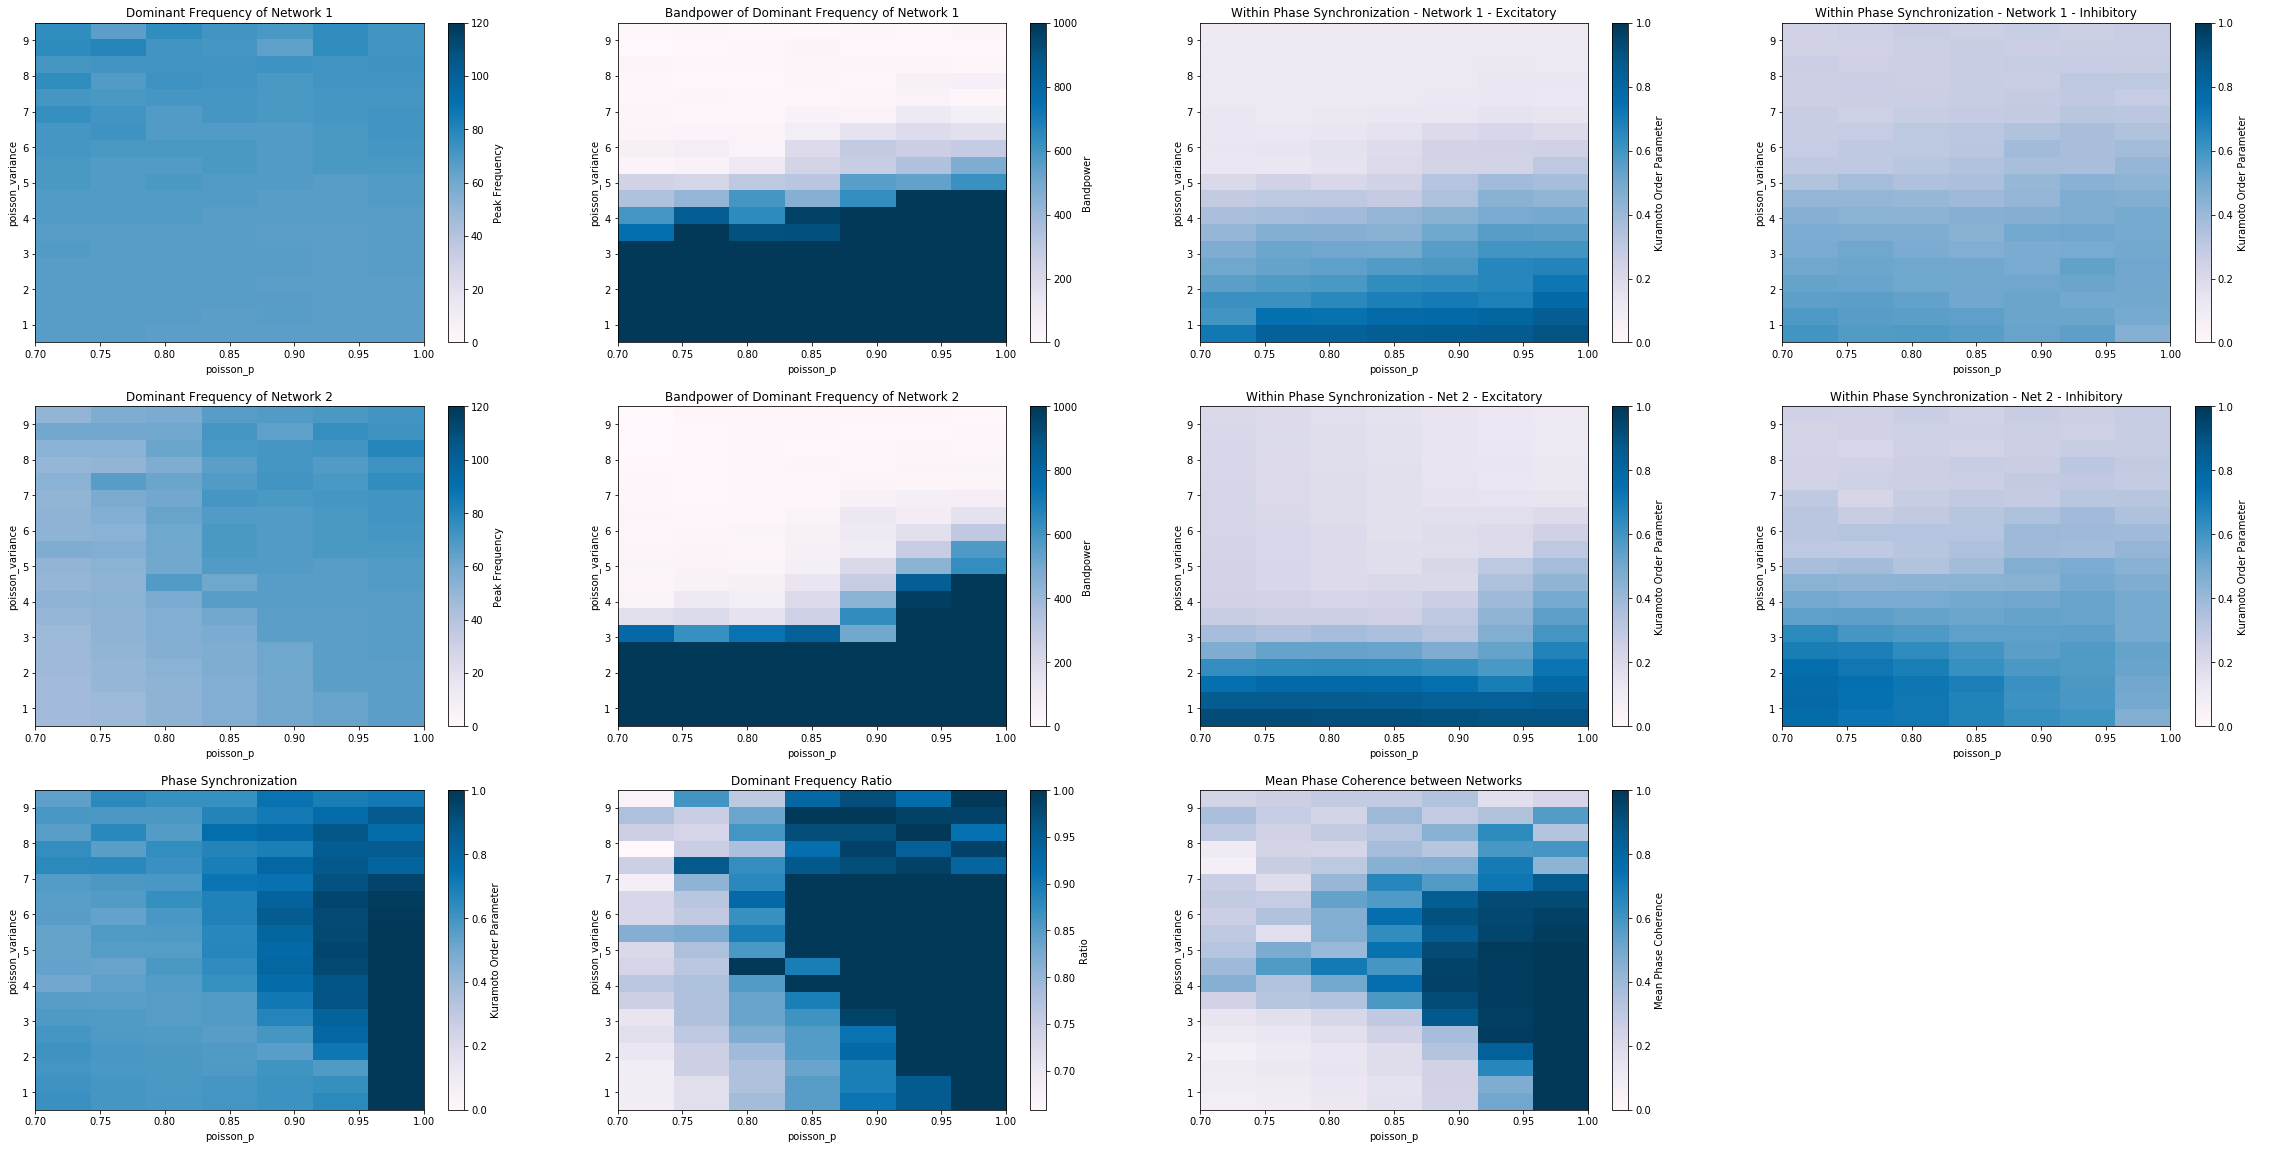

In [71]:
plots.plot_exploration(ex, vmin_ratio=None)

(<Figure size 720x792 with 12 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x15012a090>,
       dtype=object))

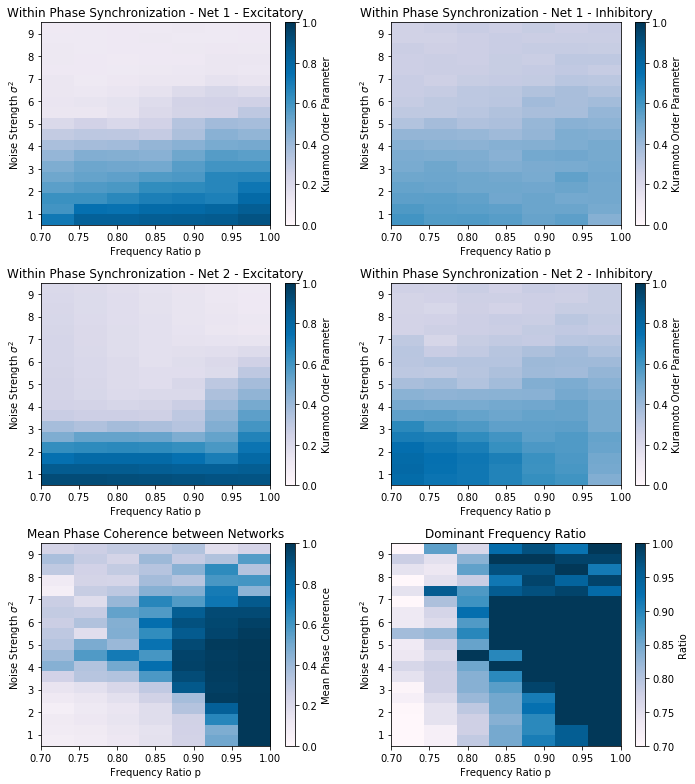

In [72]:
plots.plot_exp_figure(ex, vmin_ratio=0.7, vmin_phase=0.0, vmax_phase=1.0, filename="PING_sparse_exp")